In [ ]:
# # Bitcoin Price Prediction Using Multi-Source Sentiment Analysis

# ## Introduction
# This notebook demonstrates the process of predicting Bitcoin price trends using sentiment analysis of news articles, Wikipedia edits, and historical Bitcoin data.
# The project uses machine learning techniques to forecast Bitcoin price fluctuations based on sentiment-driven insights from multiple sources.



1. Data Collection

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

pip install yfinance


In [ ]:
pip install --upgrade yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Try to fetch data and handle exceptions
try:
    # Define the end date (yesterday)
    end_date = (datetime.today() - timedelta(days=1)).strftime('2025-05-19')

    # Define the start date (5 years before yesterday)
    start_date = (datetime.today() - timedelta(days=5*365)).strftime('2019-01-01')

    # Define the ticker symbol for Bitcoin (BTC-USD)
    ticker = 'BTC-USD'

    # Download the Bitcoin data from 5 years ago to yesterday
    bitcoin_data = yf.download(ticker, start=start_date, end=end_date)

    # Display the first few rows of the data
    print(bitcoin_data.head())

    # Save the data to a CSV file
    bitcoin_data.to_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_5_years.csv')
    print("Data saved successfully.")

except Exception as e:
    print("An error occurred:", e)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD     BTC-USD
Date                                                                      
2019-01-01  3843.520020  3850.913818  3707.231201  3746.713379  4324200990
2019-01-02  3943.409424  3947.981201  3817.409424  3849.216309  5244856836
2019-01-03  3836.741211  3935.685059  3826.222900  3931.048584  4530215219
2019-01-04  3857.717529  3865.934570  3783.853760  3832.040039  4847965467
2019-01-05  3845.194580  3904.903076  3836.900146  3851.973877  5137609824
Data saved successfully.


Data cleaning

In [ ]:
import pandas as pd

# Load the Bitcoin data from the CSV file
bitcoin_data = pd.read_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_5_years.csv')

# Display the first few rows of the DataFrame
print(bitcoin_data.head())

        Price              Close               High                Low  \
0      Ticker            BTC-USD            BTC-USD            BTC-USD   
1        Date                NaN                NaN                NaN   
2  2019-01-01   3843.52001953125  3850.913818359375  3707.231201171875   
3  2019-01-02  3943.409423828125  3947.981201171875  3817.409423828125   
4  2019-01-03    3836.7412109375   3935.68505859375  3826.222900390625   

                Open      Volume  
0            BTC-USD     BTC-USD  
1                NaN         NaN  
2   3746.71337890625  4324200990  
3   3849.21630859375  5244856836  
4  3931.048583984375  4530215219  


In [ ]:
import pandas as pd

# Load the Bitcoin data from the CSV file, skipping the first two rows
bitcoin_data = pd.read_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_5_years.csv', skiprows=2)

# Display the first few rows to understand the structure
print("Original DataFrame:")
print(bitcoin_data.head())

# Check the number of columns
print("\nNumber of columns:", bitcoin_data.shape[1])

# Rename columns based on the correct header structure
# Adjust the number of columns to match the DataFrame
bitcoin_data.columns = ['Date', 'Close', 'High', 'Low', 'Open','Volume']

# Check for missing values
print("\nMissing values in the DataFrame:")
print(bitcoin_data.isnull().sum())

# Convert 'Date' to datetime format and set it as the index
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.set_index('Date', inplace=True)

# Convert relevant columns to numeric types
bitcoin_data['Volume'] = pd.to_numeric(bitcoin_data['Volume'], errors='coerce')
bitcoin_data['Close'] = pd.to_numeric(bitcoin_data['Close'], errors='coerce')
bitcoin_data['High'] = pd.to_numeric(bitcoin_data['High'], errors='coerce')
bitcoin_data['Low'] = pd.to_numeric(bitcoin_data['Low'], errors='coerce')
bitcoin_data['Open'] = pd.to_numeric(bitcoin_data['Open'], errors='coerce')

# Check if 'Volume' column exists and convert it to numeric
# Since the 'Volume' column is missing, we will not attempt to convert it
if 'Volume' in bitcoin_data.columns:
    bitcoin_data['Volume'] = pd.to_numeric(bitcoin_data['Volume'], errors='coerce')
else:
    print("\n'Volume' column is missing from the DataFrame.")

# Display the cleaned DataFrame
print("\nCleaned Bitcoin Data:")
print(bitcoin_data.head())

Original DataFrame:
         Date   Unnamed: 1   Unnamed: 2   Unnamed: 3   Unnamed: 4  Unnamed: 5
0  2019-01-01  3843.520020  3850.913818  3707.231201  3746.713379  4324200990
1  2019-01-02  3943.409424  3947.981201  3817.409424  3849.216309  5244856836
2  2019-01-03  3836.741211  3935.685059  3826.222900  3931.048584  4530215219
3  2019-01-04  3857.717529  3865.934570  3783.853760  3832.040039  4847965467
4  2019-01-05  3845.194580  3904.903076  3836.900146  3851.973877  5137609824

Number of columns: 6

Missing values in the DataFrame:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Cleaned Bitcoin Data:
                  Close         High          Low         Open      Volume
Date                                                                      
2019-01-01  3843.520020  3850.913818  3707.231201  3746.713379  4324200990
2019-01-02  3943.409424  3947.981201  3817.409424  3849.216309  5244856836
2019-01-03  3836.741211  3935.685059  3826.22290

In [ ]:
# Display summary statistics
print("\nSummary statistics:")
print(bitcoin_data.describe())


Summary statistics:
               Close           High            Low           Open  \
count    2330.000000    2330.000000    2330.000000    2330.000000   
mean    35134.931617   35848.278029   34309.295580   35092.637838   
std     25952.220267   26452.323589   25369.331820   25919.751469   
min      3399.471680    3427.945557    3391.023682    3401.376465   
25%     10971.364746   11216.365723   10780.723145   10954.049072   
50%     29078.948242   29445.654297   28681.968750   29059.544922   
75%     51725.968750   52481.019531   50496.649414   51681.253906   
max    106446.007812  109114.882812  105291.734375  106147.296875   

             Volume  
count  2.330000e+03  
mean   3.113491e+10  
std    1.946615e+10  
min    4.324201e+09  
25%    1.814790e+10  
50%    2.731387e+10  
75%    3.868024e+10  
max    3.509679e+11  


EDA

In [ ]:
# Calculate the 30-day moving average
bitcoin_data['30_MA'] = bitcoin_data['Close'].rolling(window=30).mean()

# Calculate daily returns
bitcoin_data['Daily Return'] = bitcoin_data['Close'].pct_change()

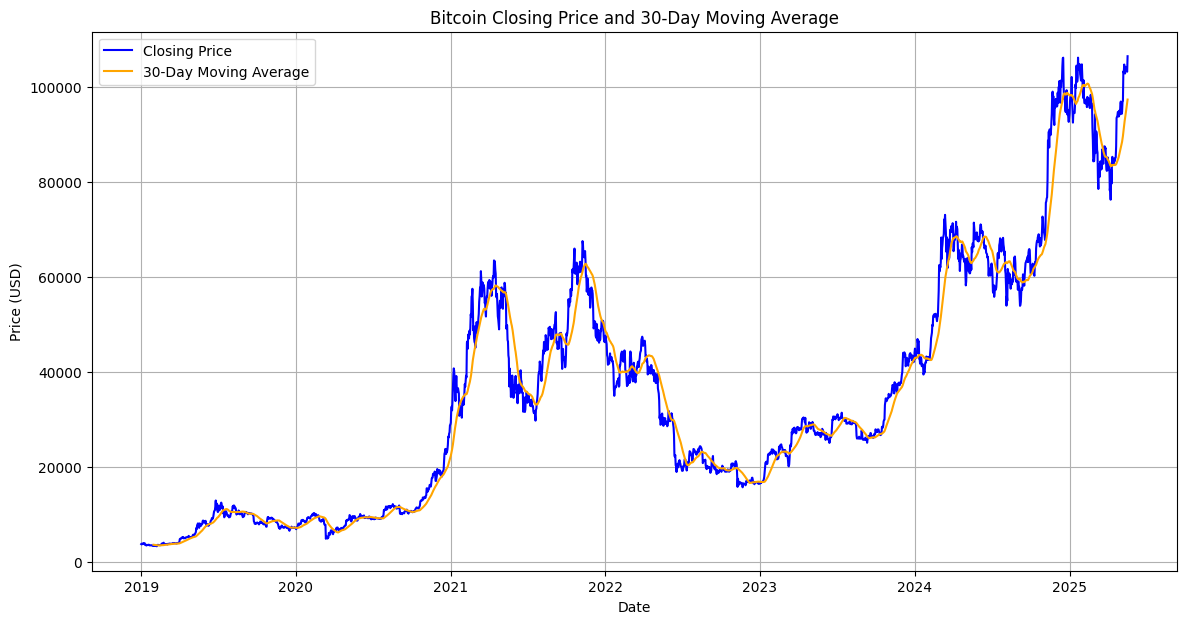

In [ ]:
import matplotlib.pyplot as plt

# Plot the closing price and the 30-day moving average
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Close'], label='Closing Price', color='blue')
plt.plot(bitcoin_data['30_MA'], label='30-Day Moving Average', color='orange')
plt.title('Bitcoin Closing Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

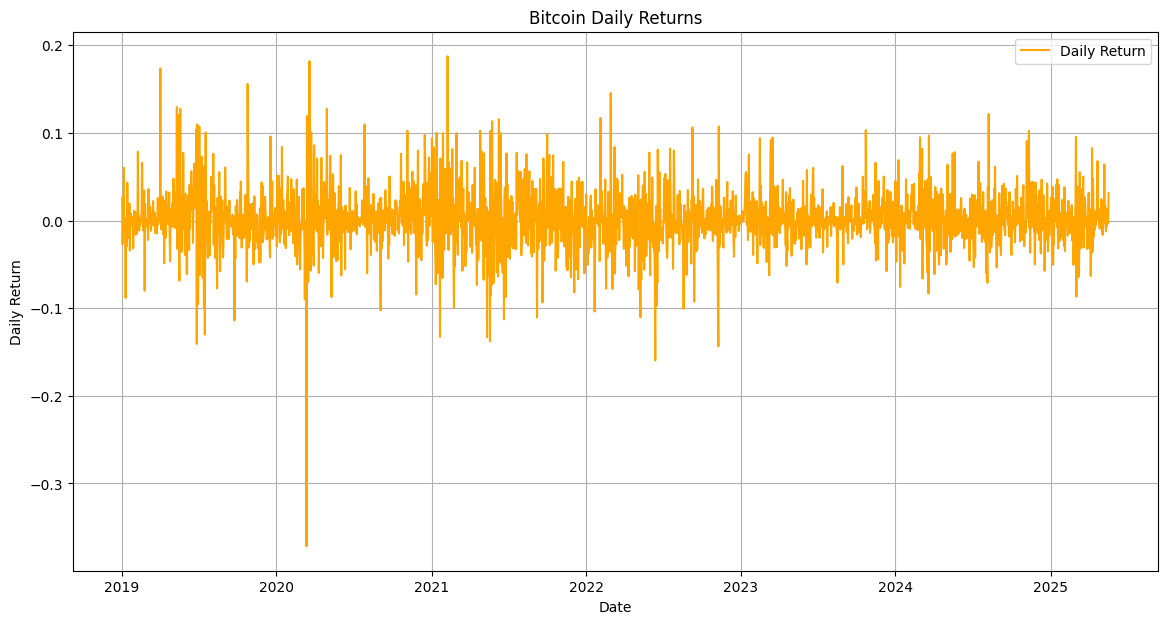

In [ ]:

# Plot daily returns
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Daily Return'], label='Daily Return', color='orange')
plt.title('Bitcoin Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid()
plt.show()

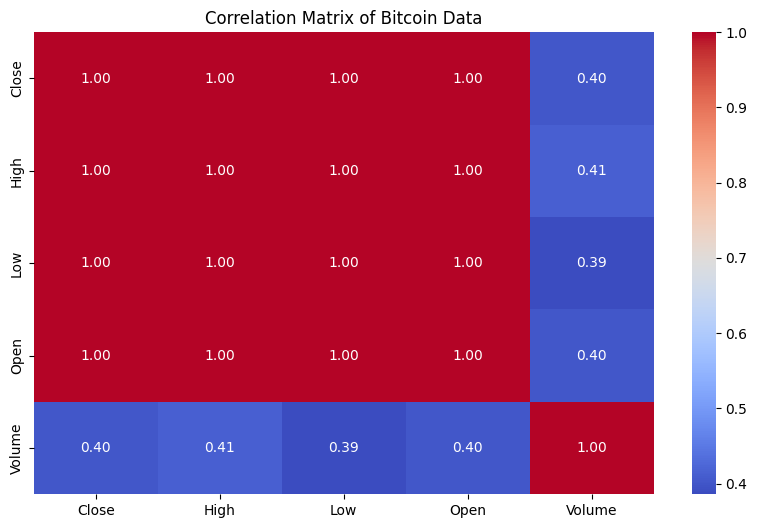

In [ ]:
import seaborn as sns

# Correlation matrix of numerical columns
plt.figure(figsize=(10, 6))
correlation_matrix = bitcoin_data[[ 'Close', 'High', 'Low', 'Open','Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Bitcoin Data')
plt.show()

Data Collection - Fetching Wikipedia Edits

In [ ]:
import requests

def fetch_wikipedia_edits(page_title):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        'action': 'query',
        'prop': 'revisions',
        'titles': page_title,
        'rvprop': 'timestamp|comment',
        'format': 'json',
        'rvlimit': 'max'  # You can adjust the limit as needed
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data

# Fetch edits for the Bitcoin Wikipedia page
wikipedia_data = fetch_wikipedia_edits("Bitcoin")

In [ ]:
import pandas as pd

# Load the Bitcoin data
bitcoin_data = pd.read_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_5_years.csv', skiprows=2)

# Correct the column names based on the structure of the data
bitcoin_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert 'Date' to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

 Data Exploration - Exploring Wikipedia Edits

In [ ]:
# Print the structure of wikipedia_data
print(wikipedia_data)

{'continue': {'rvcontinue': '20231122092240|1186318837', 'continue': '||'}, 'query': {'pages': {'28249265': {'pageid': 28249265, 'ns': 0, 'title': 'Bitcoin', 'revisions': [{'timestamp': '2025-05-20T21:23:08Z', 'comment': '/* 2008–2009: Creation */ added sources, more on market'}, {'timestamp': '2025-05-16T17:50:19Z', 'comment': 'added [[Category:Currencies introduced in 2009]] using [[WP:HC|HotCat]]'}, {'timestamp': '2025-05-13T05:43:42Z', 'comment': 'Move 1 url. [[User:GreenC/WaybackMedic_2.5|Wayback Medic 2.5]] per [[WP:URLREQ#www.vice.com]]'}, {'timestamp': '2025-05-05T22:48:20Z', 'comment': 'Reformat 3 archive links; Move 1 url. [[User:GreenC/WaybackMedic_2.5|Wayback Medic 2.5]] per [[WP:URLREQ#edition.cnn.com]]'}, {'timestamp': '2025-04-30T13:19:13Z', 'comment': '/* Mining */ 2025 update Cambridge report (Slovakia mentioned + e-waste 10x lower)'}, {'timestamp': '2025-04-29T13:02:14Z', 'comment': '1/ less ugly sentence 2/ no one cares about the white paper, what matters is that the

In [ ]:
# Display the first few rows of the Bitcoin data
print(bitcoin_data.head())

        Date        Close         High          Low         Open      Volume
0 2019-01-01  3843.520020  3850.913818  3707.231201  3746.713379  4324200990
1 2019-01-02  3943.409424  3947.981201  3817.409424  3849.216309  5244856836
2 2019-01-03  3836.741211  3935.685059  3826.222900  3931.048584  4530215219
3 2019-01-04  3857.717529  3865.934570  3783.853760  3832.040039  4847965467
4 2019-01-05  3845.194580  3904.903076  3836.900146  3851.973877  5137609824


Sentiment Analysis Function

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download the VADER lexicon
nltk.download('vader_lexicon')

def analyze_sentiment(data):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = []

    if 'query' in data and 'pages' in data['query']:
        for revision in data['query']['pages'].values():
            if 'revisions' in revision:
                for rev in revision['revisions']:
                    comment = rev.get('comment', '')
                    sentiment = analyzer.polarity_scores(comment)['compound']

                    # Consider neutral sentiments as negative
                    if -0.05 < sentiment < 0.05:
                        sentiment = -0.1  # Set neutral sentiment to -0.1

                    timestamp = rev['timestamp']
                    sentiment_scores.append({'timestamp': timestamp, 'sentiment': sentiment})

    return sentiment_scores

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis on Wikipedia edits

In [ ]:
# Perform sentiment analysis on Wikipedia edits
wikipedia_sentiments = analyze_sentiment(wikipedia_data)

# Convert sentiment data to DataFrame
wikipedia_sentiments_df = pd.DataFrame(wikipedia_sentiments)

# Rename the sentiment column
wikipedia_sentiments_df.rename(columns={'sentiment': 'wikipedia_sentiment'}, inplace=True)

# Convert timestamps to datetime objects
wikipedia_sentiments_df['timestamp'] = pd.to_datetime(wikipedia_sentiments_df['timestamp'])

# Extract only the date part (ignore the time part)
wikipedia_sentiments_df['date'] = wikipedia_sentiments_df['timestamp'].dt.date

# Save the DataFrame to a CSV file
wikipedia_sentiments_df.to_csv('wikipedia_sentiments.csv', index=False)

# Display the result
print(wikipedia_sentiments_df)

                    timestamp  wikipedia_sentiment        date
0   2025-05-20 21:23:08+00:00               0.2732  2025-05-20
1   2025-05-16 17:50:19+00:00              -0.1000  2025-05-16
2   2025-05-13 05:43:42+00:00              -0.1000  2025-05-13
3   2025-05-05 22:48:20+00:00              -0.1000  2025-05-05
4   2025-04-30 13:19:13+00:00              -0.1000  2025-04-30
..                        ...                  ...         ...
495 2023-11-22 11:04:21+00:00               0.2732  2023-11-22
496 2023-11-22 11:02:06+00:00              -0.1000  2023-11-22
497 2023-11-22 10:32:07+00:00              -0.1000  2023-11-22
498 2023-11-22 10:27:15+00:00              -0.1000  2023-11-22
499 2023-11-22 10:18:50+00:00              -0.1000  2023-11-22

[500 rows x 3 columns]


Merge Datasets

In [ ]:
# Load the Bitcoin price data
bitcoin_data = pd.read_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_5_years.csv', skiprows=2)

# Correct the column names based on the structure of the data
bitcoin_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert 'Date' to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

In [ ]:
# Ensure 'date' in wikipedia_sentiments_df is datetime64[ns] and properly formatted
wikipedia_sentiments_df['date'] = pd.to_datetime(wikipedia_sentiments_df['date'])

# Merge the two datasets based on the 'Date' column
merged_data = pd.merge(bitcoin_data, wikipedia_sentiments_df[['date', 'wikipedia_sentiment']], left_on='Date', right_on='date', how='left')

# Drop 'date' column from the merged data
merged_data.drop(columns=['date'], inplace=True)

# Fill missing sentiment values with 0 (neutral sentiment)
merged_data['wikipedia_sentiment'] = merged_data['wikipedia_sentiment'].fillna(0)

Adjust Sentiment Values

In [ ]:
# Handling Neutral Sentiment by converting neutral sentiments to negative
merged_data['wikipedia_sentiment'] = merged_data['wikipedia_sentiment'].apply(lambda x: -0.1 if abs(x) < 0.05 else x)

# Add a 'tomorrow_price' column (next day's closing price)
merged_data['tomorrow_price'] = merged_data['Close'].shift(-1)

# Rename columns for better clarity
merged_data.rename(columns={'Close': 'closing_price'}, inplace=True)

In [ ]:

import os
import pandas as pd

# Assuming merged_data is your DataFrame containing the data you want to save

# Define the path where you want to save the CSV file
save_path = '/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_5_years.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the merged data to the specified CSV file
merged_data.to_csv(save_path, index=False)

# Display a message indicating that the file has been saved
print(f"Merged data saved to '{save_path}'.")

Merged data saved to '/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_5_years.csv'.


EDA

In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(merged_data.describe())


Summary statistics:
                                Date  closing_price           High  \
count                           2705    2705.000000    2705.000000   
mean   2022-06-16 08:24:39.926062848   36989.411498   37708.121166   
min              2019-01-01 00:00:00    3399.471680    3427.945557   
25%              2020-11-07 00:00:00   15332.315430   15706.404297   
50%              2022-09-14 00:00:00   35862.378906   37227.691406   
75%              2023-11-28 00:00:00   51779.144531   52474.105469   
max              2025-05-18 00:00:00  106446.007812  109114.882812   
std                              NaN   25517.222763   26002.826935   

                 Low           Open        Volume  wikipedia_sentiment  \
count    2705.000000    2705.000000  2.705000e+03          2705.000000   
mean    36128.137187   36886.401727  3.058335e+10            -0.090749   
min      3391.023682    3401.376465  4.324201e+09            -0.743000   
25%     14744.110352   15290.909180  1.824903e+10   

In [ ]:
# Correlation between columns (e.g., between Bitcoin Close price and sentiment)
correlation = merged_data[['closing_price', 'wikipedia_sentiment']].corr()
print("\nCorrelation between 'Closing Price' and 'Sentiment':")
print(correlation)


Correlation between 'Closing Price' and 'Sentiment':
                     closing_price  wikipedia_sentiment
closing_price             1.000000             0.096299
wikipedia_sentiment       0.096299             1.000000


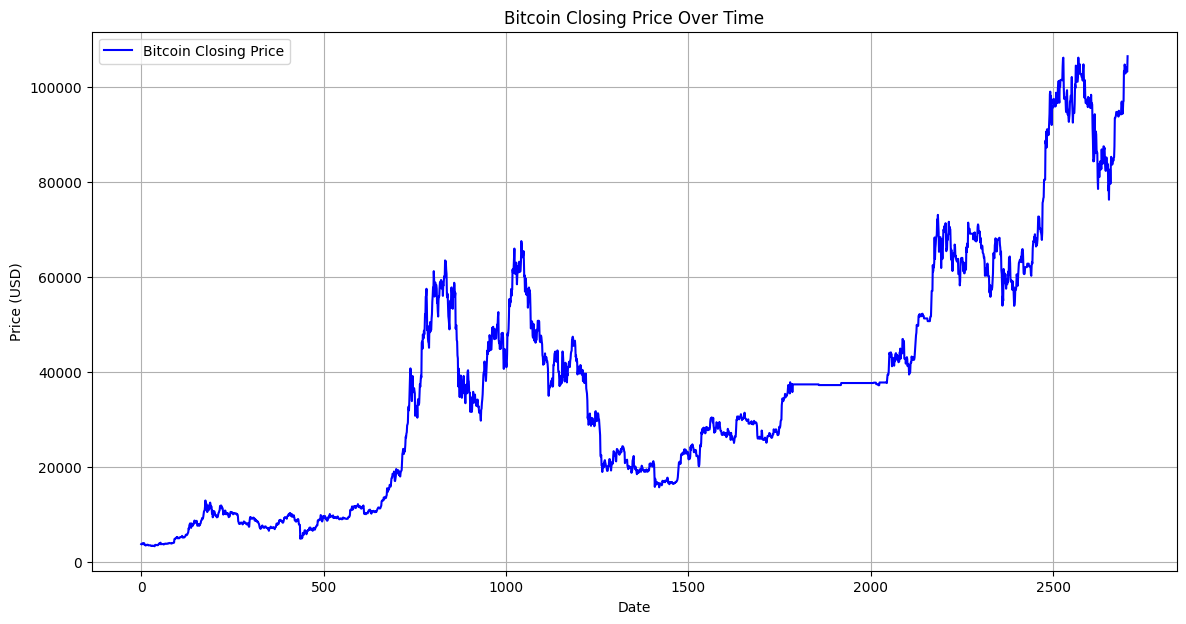

In [ ]:
import matplotlib.pyplot as plt

# Plot Bitcoin Closing Price Over Time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['closing_price'], label='Bitcoin Closing Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Correlation matrix
correlation_matrix = merged_data[['closing_price', 'wikipedia_sentiment', 'tomorrow_price']].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                     closing_price  wikipedia_sentiment  tomorrow_price
closing_price             1.000000             0.096299        0.998859
wikipedia_sentiment       0.096299             1.000000        0.096557
tomorrow_price            0.998859             0.096557        1.000000


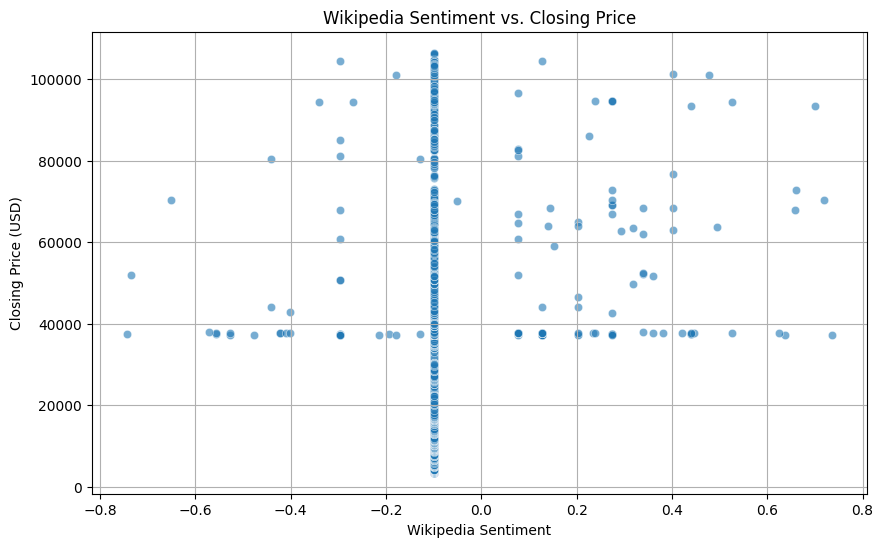

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='wikipedia_sentiment', y='closing_price', alpha=0.6)
plt.title('Wikipedia Sentiment vs. Closing Price')
plt.xlabel('Wikipedia Sentiment')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

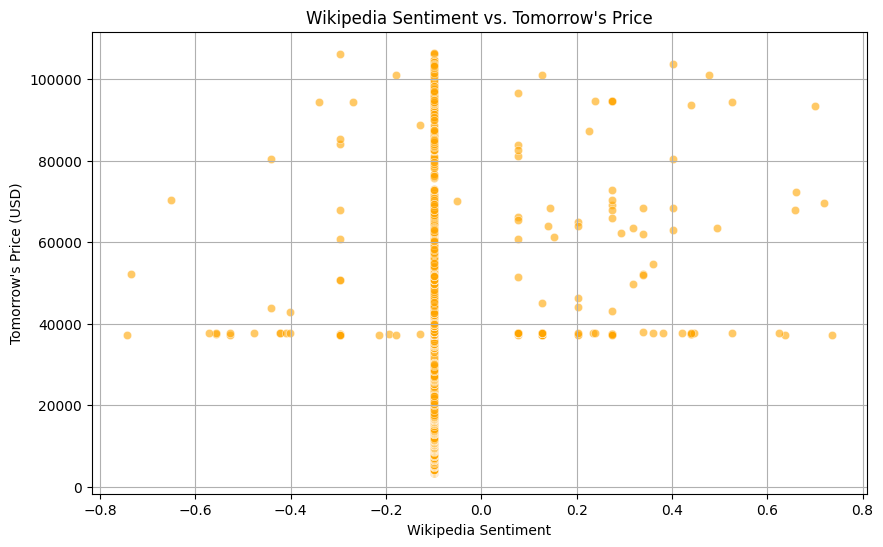

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='wikipedia_sentiment', y='tomorrow_price', alpha=0.6, color='orange')
plt.title('Wikipedia Sentiment vs. Tomorrow\'s Price')
plt.xlabel('Wikipedia Sentiment')
plt.ylabel('Tomorrow\'s Price (USD)')
plt.grid(True)
plt.show()

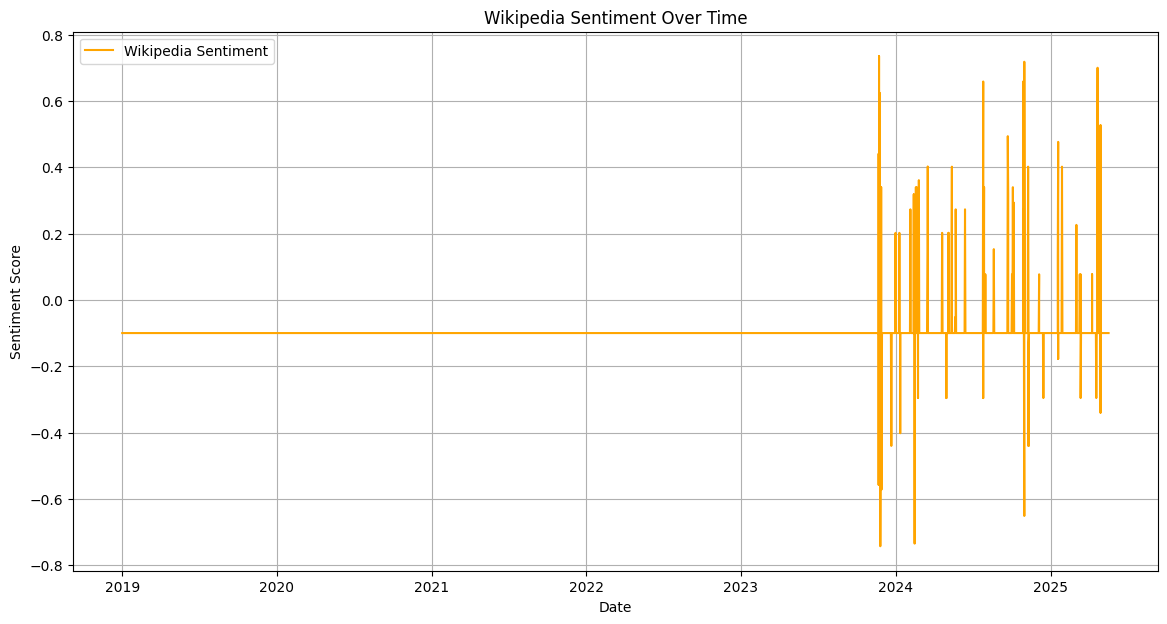

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['wikipedia_sentiment'], label='Wikipedia Sentiment', color='orange')
plt.title('Wikipedia Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

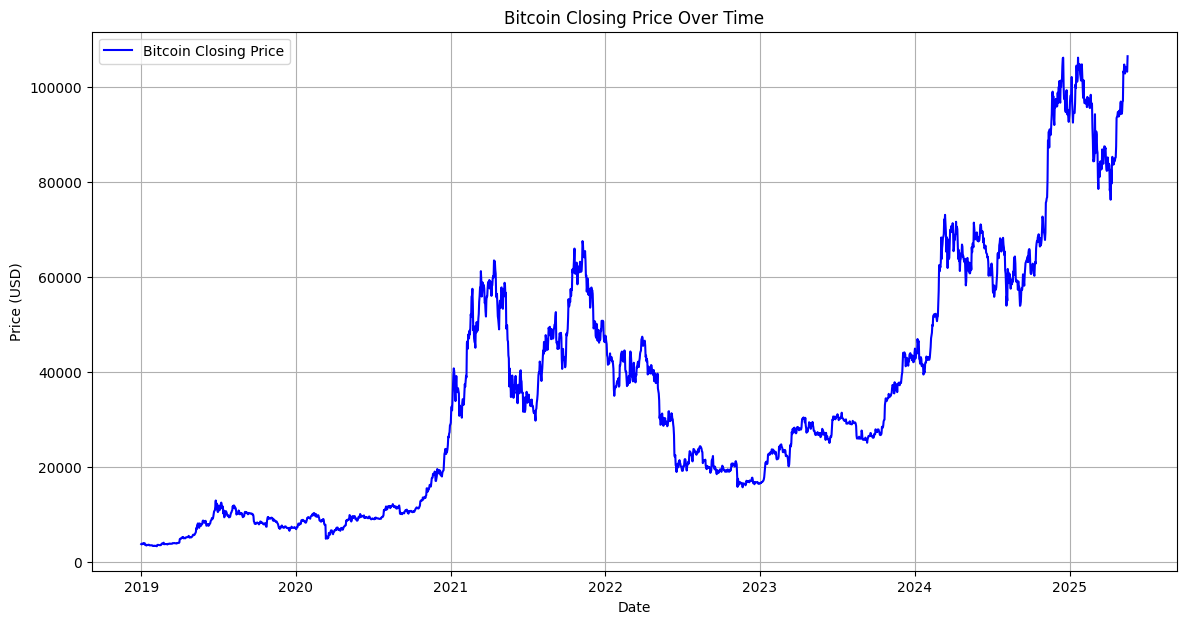

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['closing_price'], label='Bitcoin Closing Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Categorize sentiment
def categorize_sentiment(sentiment):
    if sentiment > 0.05:
        return 'Positive'
    elif sentiment < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_data['sentiment_category'] = merged_data['wikipedia_sentiment'].apply(categorize_sentiment)

# Group by sentiment category and calculate mean closing price and tomorrow's price
grouped_data = merged_data.groupby('sentiment_category')[['closing_price', 'tomorrow_price']].mean()
print("\nAverage Closing Price and Tomorrow's Price by Sentiment Category:")
print(grouped_data)


Average Closing Price and Tomorrow's Price by Sentiment Category:
                    closing_price  tomorrow_price
sentiment_category                               
Negative             36343.287228    36353.373758
Positive             54177.635682    54241.046596


In [ ]:
# Summary statistics by sentiment category
summary_stats = merged_data.groupby('sentiment_category')[['closing_price', 'tomorrow_price']].describe()
print("\nSummary Statistics by Sentiment Category:")
print(summary_stats)


Summary Statistics by Sentiment Category:
                   closing_price                                            \
                           count          mean           std           min   
sentiment_category                                                           
Negative                  2607.0  36343.287228  25457.250373   3399.471680   
Positive                    98.0  54177.635682  20742.981155  37289.621094   

                                                                             \
                             25%           50%           75%            max   
sentiment_category                                                            
Negative            11980.855957  33897.046875  51304.972656  106446.007812   
Positive            37720.281250  37775.683594  68169.916016  104408.070312   

                   tomorrow_price                                            \
                            count          mean           std           min   
sentiment_ca

Collection of The Guaurdian News

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm
import time

# Configuration
API_KEY = "d40a5c30-8b6d-4f17-a4ba-3deab348a109"
START_DATE = "2019-01-01"
END_DATE = datetime.now().strftime("%Y-%m-%d")
OUTPUT_FILE = "guardian_bitcoin_simple.csv"

# Simplified query that works with Guardian API
QUERY = "Bitcoin OR BTC OR cryptocurrency"

def fetch_guardian_articles(from_date, to_date):
    """Fetch articles with simplified query"""
    all_articles = []
    page = 1
    total_pages = 1

    while page <= total_pages:
        url = "https://content.guardianapis.com/search"
        params = {
            "q": QUERY,
            "from-date": from_date,
            "to-date": to_date,
            "api-key": API_KEY,
            "page": page,
            "page-size": 50,
            "show-fields": "headline,trailText,body,byline,wordcount",
            "order-by": "newest"
        }

        try:
            response = requests.get(url, params=params, timeout=15)
            data = response.json()

            if 'response' not in data:
                print(f"Unexpected API response structure on page {page}")
                break

            articles = data['response'].get('results', [])
            all_articles.extend(articles)

            if page == 1:
                total_pages = min(10, data['response'].get('pages', 1))
                print(f"Found {data['response']['total']} results for {from_date} to {to_date}")

            page += 1
            time.sleep(0.5)

        except Exception as e:
            print(f"Error on page {page}: {str(e)}")
            break

    return all_articles

def main():
    print(f"Scraping Bitcoin news from {START_DATE} to {END_DATE}")
    print(f"Using query: {QUERY}")

    # Create monthly batches
    date_ranges = pd.date_range(START_DATE, END_DATE, freq='1M')
    date_ranges = [d.strftime('%Y-%m-%d') for d in date_ranges]
    if date_ranges[-1] != END_DATE:
        date_ranges.append(END_DATE)

    all_articles = []
    for i in tqdm(range(len(date_ranges)-1)):
        from_date = date_ranges[i]
        to_date = date_ranges[i+1]

        articles = fetch_guardian_articles(from_date, to_date)
        if articles:
            all_articles.extend(articles)
            print(f"Collected {len(articles)} articles for {from_date} to {to_date}")
        else:
            print(f"No articles found for {from_date} to {to_date}")

    if not all_articles:
        print("No articles were collected. Check your API key and query.")
        return pd.DataFrame()

    # Process results
    processed_articles = []
    for article in all_articles:
        try:
            processed_articles.append({
                'title': article.get('fields', {}).get('headline', ''),
                'url': article.get('webUrl', ''),
                'content': article.get('fields', {}).get('body', ''),
                'published_date': article.get('webPublicationDate', '')[:10],
                'source': 'The Guardian',
                'word_count': int(article.get('fields', {}).get('wordcount', 0)),
                'section': article.get('sectionName', '')
            })
        except Exception as e:
            print(f"Skipping article due to processing error: {str(e)}")

    df = pd.DataFrame(processed_articles)

    if df.empty:
        print("No valid articles were processed.")
        return pd.DataFrame()

    # Remove duplicates and sort
    df = df.drop_duplicates(subset=['url'])
    df = df.sort_values('published_date', ascending=False)
    df.to_csv(OUTPUT_FILE, index=False)

    # Calculate statistics
    days_diff = (datetime.strptime(END_DATE, '%Y-%m-%d') - datetime.strptime(START_DATE, '%Y-%m-%d')).days
    avg_per_day = len(df)/days_diff if days_diff > 0 else 0

    print("\nScraping complete!")
    print(f"Collected {len(df)} unique articles")
    print(f"Date coverage: {df['published_date'].min()} to {df['published_date'].max()}")
    print(f"Average articles per day: {avg_per_day:.1f}")
    print("\nSample data:")
    return df.head(10)

if __name__ == "__main__":
    result = main()
    if not result.empty:
        print(result[['title', 'published_date', 'word_count']])

<ipython-input-35-73b8743ccc15>:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_ranges = pd.date_range(START_DATE, END_DATE, freq='1M')


Scraping Bitcoin news from 2019-01-01 to 2025-05-20
Using query: Bitcoin OR BTC OR cryptocurrency


  0%|          | 0/76 [00:00<?, ?it/s]

Found 8 results for 2019-01-31 to 2019-02-28


  1%|▏         | 1/76 [00:01<01:30,  1.21s/it]

Collected 8 articles for 2019-01-31 to 2019-02-28
Found 6 results for 2019-02-28 to 2019-03-31


  3%|▎         | 2/76 [00:02<01:33,  1.27s/it]

Collected 6 articles for 2019-02-28 to 2019-03-31
Found 5 results for 2019-03-31 to 2019-04-30


  4%|▍         | 3/76 [00:03<01:29,  1.22s/it]

Collected 5 articles for 2019-03-31 to 2019-04-30
Found 10 results for 2019-04-30 to 2019-05-31


  5%|▌         | 4/76 [00:04<01:26,  1.20s/it]

Collected 10 articles for 2019-04-30 to 2019-05-31
Found 34 results for 2019-05-31 to 2019-06-30


  7%|▋         | 5/76 [00:06<01:36,  1.35s/it]

Collected 34 articles for 2019-05-31 to 2019-06-30
Found 23 results for 2019-06-30 to 2019-07-31


  8%|▊         | 6/76 [00:07<01:37,  1.40s/it]

Collected 23 articles for 2019-06-30 to 2019-07-31
Found 10 results for 2019-07-31 to 2019-08-31


  9%|▉         | 7/76 [00:09<01:34,  1.37s/it]

Collected 10 articles for 2019-07-31 to 2019-08-31
Found 14 results for 2019-08-31 to 2019-09-30


 11%|█         | 8/76 [00:10<01:35,  1.41s/it]

Collected 14 articles for 2019-08-31 to 2019-09-30
Found 21 results for 2019-09-30 to 2019-10-31


 12%|█▏        | 9/76 [00:12<01:35,  1.43s/it]

Collected 21 articles for 2019-09-30 to 2019-10-31
Found 22 results for 2019-10-31 to 2019-11-30


 13%|█▎        | 10/76 [00:13<01:31,  1.39s/it]

Collected 22 articles for 2019-10-31 to 2019-11-30
Found 6 results for 2019-11-30 to 2019-12-31


 14%|█▍        | 11/76 [00:14<01:25,  1.32s/it]

Collected 6 articles for 2019-11-30 to 2019-12-31
Found 9 results for 2019-12-31 to 2020-01-31


 16%|█▌        | 12/76 [00:15<01:24,  1.31s/it]

Collected 9 articles for 2019-12-31 to 2020-01-31
Found 12 results for 2020-01-31 to 2020-02-29


 17%|█▋        | 13/76 [00:17<01:22,  1.31s/it]

Collected 12 articles for 2020-01-31 to 2020-02-29
Found 15 results for 2020-02-29 to 2020-03-31


 18%|█▊        | 14/76 [00:18<01:25,  1.37s/it]

Collected 15 articles for 2020-02-29 to 2020-03-31
Found 9 results for 2020-03-31 to 2020-04-30


 20%|█▉        | 15/76 [00:20<01:22,  1.35s/it]

Collected 9 articles for 2020-03-31 to 2020-04-30
Found 4 results for 2020-04-30 to 2020-05-31


 21%|██        | 16/76 [00:21<01:17,  1.29s/it]

Collected 4 articles for 2020-04-30 to 2020-05-31


 22%|██▏       | 17/76 [00:21<01:02,  1.06s/it]

Unexpected API response structure on page 1
No articles found for 2020-05-31 to 2020-06-30
Found 20 results for 2020-06-30 to 2020-07-31


 24%|██▎       | 18/76 [00:23<01:08,  1.19s/it]

Collected 20 articles for 2020-06-30 to 2020-07-31
Found 17 results for 2020-07-31 to 2020-08-31


 25%|██▌       | 19/76 [00:24<01:12,  1.28s/it]

Collected 17 articles for 2020-07-31 to 2020-08-31
Found 4 results for 2020-08-31 to 2020-09-30


 26%|██▋       | 20/76 [00:26<01:11,  1.28s/it]

Collected 4 articles for 2020-08-31 to 2020-09-30
Found 12 results for 2020-09-30 to 2020-10-31


 28%|██▊       | 21/76 [00:27<01:14,  1.36s/it]

Collected 12 articles for 2020-09-30 to 2020-10-31
Found 16 results for 2020-10-31 to 2020-11-30


 29%|██▉       | 22/76 [00:29<01:18,  1.45s/it]

Collected 16 articles for 2020-10-31 to 2020-11-30


 30%|███       | 23/76 [00:29<01:02,  1.19s/it]

Unexpected API response structure on page 1
No articles found for 2020-11-30 to 2020-12-31
Found 34 results for 2020-12-31 to 2021-01-31


 32%|███▏      | 24/76 [00:31<01:11,  1.38s/it]

Collected 34 articles for 2020-12-31 to 2021-01-31
Found 51 results for 2021-01-31 to 2021-02-28


 33%|███▎      | 25/76 [00:34<01:26,  1.69s/it]

Unexpected API response structure on page 2
Collected 50 articles for 2021-01-31 to 2021-02-28
Found 40 results for 2021-02-28 to 2021-03-31


 34%|███▍      | 26/76 [00:35<01:26,  1.73s/it]

Collected 40 articles for 2021-02-28 to 2021-03-31


 36%|███▌      | 27/76 [00:36<01:06,  1.36s/it]

Unexpected API response structure on page 1
No articles found for 2021-03-31 to 2021-04-30
Found 63 results for 2021-04-30 to 2021-05-31


 37%|███▋      | 28/76 [00:39<01:31,  1.91s/it]

Collected 63 articles for 2021-04-30 to 2021-05-31
Found 56 results for 2021-05-31 to 2021-06-30


 38%|███▊      | 29/76 [00:42<01:44,  2.22s/it]

Collected 56 articles for 2021-05-31 to 2021-06-30


 39%|███▉      | 30/76 [00:43<01:18,  1.71s/it]

Unexpected API response structure on page 1
No articles found for 2021-06-30 to 2021-07-31


 41%|████      | 31/76 [00:43<01:00,  1.35s/it]

Unexpected API response structure on page 1
No articles found for 2021-07-31 to 2021-08-31
Found 27 results for 2021-08-31 to 2021-09-30


 42%|████▏     | 32/76 [00:45<01:01,  1.40s/it]

Collected 27 articles for 2021-08-31 to 2021-09-30
Found 31 results for 2021-09-30 to 2021-10-31


 43%|████▎     | 33/76 [00:46<01:01,  1.43s/it]

Collected 31 articles for 2021-09-30 to 2021-10-31
Found 46 results for 2021-10-31 to 2021-11-30


 45%|████▍     | 34/76 [00:48<01:03,  1.51s/it]

Collected 46 articles for 2021-10-31 to 2021-11-30
Found 47 results for 2021-11-30 to 2021-12-31


 46%|████▌     | 35/76 [00:49<01:04,  1.56s/it]

Collected 47 articles for 2021-11-30 to 2021-12-31
Found 60 results for 2021-12-31 to 2022-01-31


 47%|████▋     | 36/76 [00:52<01:12,  1.82s/it]

Unexpected API response structure on page 2
Collected 50 articles for 2021-12-31 to 2022-01-31
Found 56 results for 2022-01-31 to 2022-02-28


 49%|████▊     | 37/76 [00:55<01:25,  2.19s/it]

Collected 56 articles for 2022-01-31 to 2022-02-28


 50%|█████     | 38/76 [00:55<01:04,  1.69s/it]

Unexpected API response structure on page 1
No articles found for 2022-02-28 to 2022-03-31
Found 33 results for 2022-03-31 to 2022-04-30


 51%|█████▏    | 39/76 [00:57<01:00,  1.63s/it]

Collected 33 articles for 2022-03-31 to 2022-04-30


 53%|█████▎    | 40/76 [00:57<00:46,  1.29s/it]

Unexpected API response structure on page 1
No articles found for 2022-04-30 to 2022-05-31


 54%|█████▍    | 41/76 [00:58<00:37,  1.06s/it]

Unexpected API response structure on page 1
No articles found for 2022-05-31 to 2022-06-30
Found 42 results for 2022-06-30 to 2022-07-31


 55%|█████▌    | 42/76 [01:00<00:41,  1.23s/it]

Collected 42 articles for 2022-06-30 to 2022-07-31
Found 29 results for 2022-07-31 to 2022-08-31


 57%|█████▋    | 43/76 [01:01<00:42,  1.30s/it]

Collected 29 articles for 2022-07-31 to 2022-08-31


 58%|█████▊    | 44/76 [01:02<00:33,  1.06s/it]

Unexpected API response structure on page 1
No articles found for 2022-08-31 to 2022-09-30
Found 27 results for 2022-09-30 to 2022-10-31


 59%|█████▉    | 45/76 [01:03<00:36,  1.19s/it]

Collected 27 articles for 2022-09-30 to 2022-10-31


 61%|██████    | 46/76 [01:04<00:29,  1.01it/s]

Unexpected API response structure on page 1
No articles found for 2022-10-31 to 2022-11-30
Found 74 results for 2022-11-30 to 2022-12-31


 62%|██████▏   | 47/76 [01:07<00:46,  1.59s/it]

Collected 74 articles for 2022-11-30 to 2022-12-31
Found 40 results for 2022-12-31 to 2023-01-31


 63%|██████▎   | 48/76 [01:08<00:45,  1.62s/it]

Collected 40 articles for 2022-12-31 to 2023-01-31


 64%|██████▍   | 49/76 [01:09<00:34,  1.28s/it]

Unexpected API response structure on page 1
No articles found for 2023-01-31 to 2023-02-28


 66%|██████▌   | 50/76 [01:09<00:27,  1.05s/it]

Unexpected API response structure on page 1
No articles found for 2023-02-28 to 2023-03-31
Found 29 results for 2023-03-31 to 2023-04-30


 67%|██████▋   | 51/76 [01:11<00:29,  1.17s/it]

Collected 29 articles for 2023-03-31 to 2023-04-30
Found 24 results for 2023-04-30 to 2023-05-31


 68%|██████▊   | 52/76 [01:12<00:30,  1.26s/it]

Collected 24 articles for 2023-04-30 to 2023-05-31
Found 29 results for 2023-05-31 to 2023-06-30


 70%|██████▉   | 53/76 [01:14<00:30,  1.32s/it]

Collected 29 articles for 2023-05-31 to 2023-06-30
Found 24 results for 2023-06-30 to 2023-07-31


 71%|███████   | 54/76 [01:15<00:29,  1.36s/it]

Collected 24 articles for 2023-06-30 to 2023-07-31


 72%|███████▏  | 55/76 [01:16<00:23,  1.10s/it]

Unexpected API response structure on page 1
No articles found for 2023-07-31 to 2023-08-31


 74%|███████▎  | 56/76 [01:16<00:18,  1.08it/s]

Unexpected API response structure on page 1
No articles found for 2023-08-31 to 2023-09-30
Found 53 results for 2023-09-30 to 2023-10-31


 75%|███████▌  | 57/76 [01:18<00:24,  1.31s/it]

Unexpected API response structure on page 2
Collected 50 articles for 2023-09-30 to 2023-10-31


 76%|███████▋  | 58/76 [01:19<00:19,  1.07s/it]

Unexpected API response structure on page 1
No articles found for 2023-10-31 to 2023-11-30
Found 18 results for 2023-11-30 to 2023-12-31


 78%|███████▊  | 59/76 [01:20<00:20,  1.19s/it]

Collected 18 articles for 2023-11-30 to 2023-12-31


 79%|███████▉  | 60/76 [01:21<00:15,  1.02it/s]

Unexpected API response structure on page 1
No articles found for 2023-12-31 to 2024-01-31
Found 41 results for 2024-01-31 to 2024-02-29


 80%|████████  | 61/76 [01:22<00:17,  1.15s/it]

Collected 41 articles for 2024-01-31 to 2024-02-29


 82%|████████▏ | 62/76 [01:23<00:13,  1.05it/s]

Unexpected API response structure on page 1
No articles found for 2024-02-29 to 2024-03-31


 83%|████████▎ | 63/76 [01:23<00:10,  1.22it/s]

Unexpected API response structure on page 1
No articles found for 2024-03-31 to 2024-04-30


 84%|████████▍ | 64/76 [01:24<00:08,  1.38it/s]

Unexpected API response structure on page 1
No articles found for 2024-04-30 to 2024-05-31


 86%|████████▌ | 65/76 [01:24<00:07,  1.51it/s]

Unexpected API response structure on page 1
No articles found for 2024-05-31 to 2024-06-30
Found 27 results for 2024-06-30 to 2024-07-31


 87%|████████▋ | 66/76 [01:26<00:09,  1.10it/s]

Collected 27 articles for 2024-06-30 to 2024-07-31


 88%|████████▊ | 67/76 [01:26<00:07,  1.27it/s]

Unexpected API response structure on page 1
No articles found for 2024-07-31 to 2024-08-31
Found 27 results for 2024-08-31 to 2024-09-30


 89%|████████▉ | 68/76 [01:28<00:08,  1.05s/it]

Collected 27 articles for 2024-08-31 to 2024-09-30


 91%|█████████ | 69/76 [01:29<00:06,  1.12it/s]

Unexpected API response structure on page 1
No articles found for 2024-09-30 to 2024-10-31
Found 79 results for 2024-10-31 to 2024-11-30


 92%|█████████▏| 70/76 [01:31<00:07,  1.28s/it]

Unexpected API response structure on page 2
Collected 50 articles for 2024-10-31 to 2024-11-30


 93%|█████████▎| 71/76 [01:31<00:05,  1.05s/it]

Unexpected API response structure on page 1
No articles found for 2024-11-30 to 2024-12-31


 95%|█████████▍| 72/76 [01:32<00:03,  1.13it/s]

Unexpected API response structure on page 1
No articles found for 2024-12-31 to 2025-01-31


 96%|█████████▌| 73/76 [01:32<00:02,  1.29it/s]

Unexpected API response structure on page 1
No articles found for 2025-01-31 to 2025-02-28


 97%|█████████▋| 74/76 [01:33<00:01,  1.43it/s]

Unexpected API response structure on page 1
No articles found for 2025-02-28 to 2025-03-31


 99%|█████████▊| 75/76 [01:33<00:00,  1.55it/s]

Unexpected API response structure on page 1
No articles found for 2025-03-31 to 2025-04-30


100%|██████████| 76/76 [01:34<00:00,  1.24s/it]

Unexpected API response structure on page 1
No articles found for 2025-04-30 to 2025-05-20



Scraping complete!
Collected 1328 unique articles
Date coverage: 2019-01-31 to 2024-11-30
Average articles per day: 0.6

Sample data:
                                                  title published_date  \
1291  ‘It’s almost dirty money’: the older generatio...     2024-11-30   
1292  Alder Hey children’s hospital explores ‘data b...     2024-11-29   
1293  A Renaissance pooch, pop art hammers and subli...     2024-11-29   
1294  Crypto entrepreneur eats banana art he bought ...     2024-11-29   
1295  Trump’s promise to loosen crypto regulations m...     2024-11-27   
1297  Trump’s picks to reward top donors who helped ...     2024-11-26   
1298  Romance scam allegedly lured Australian men on...     2024-11-26   
1296  X marks the bitcoin: the treasure hunt book is...     2024-11-26   
1299  The week in theatre: The Red Shoes; Wolves on ...     2024-11-24   
1300  Trick of the light: the enduring appeal of Ren...     2024-11-23   

      word_count  
1291        1107  
1292        

In [ ]:
import pandas as pd

# Load the collected data
df = pd.read_csv("guardian_bitcoin_simple.csv")

# Convert published_date to datetime
df['published_date'] = pd.to_datetime(df['published_date'])

# 1. Count articles per day
daily_counts = df['published_date'].value_counts().sort_index()

# 2. Find days with no articles
date_range = pd.date_range(start=df['published_date'].min(),
                          end=df['published_date'].max())
missing_days = [d.date() for d in date_range if d not in daily_counts.index]

# 3. Get statistics
stats = {
    "total_articles": len(df),
    "total_days": len(date_range),
    "days_with_articles": len(daily_counts),
    "days_with_no_articles": len(missing_days),
    "max_articles_day": daily_counts.max(),
    "min_articles_day": daily_counts.min(),
    "avg_articles_day": daily_counts.mean(),
    "median_articles_day": daily_counts.median()
}

# Print results
print("Article Distribution Analysis:")
for k, v in stats.items():
    print(f"{k.replace('_', ' ').title()}: {v}")

print("\nDays with most articles:")
print(daily_counts.nlargest(5))

if missing_days:
    print(f"\nFirst 10 days with no articles:")
    print(missing_days[:10])
else:
    print("\nNo days without articles!")

Article Distribution Analysis:
Total Articles: 1328
Total Days: 2131
Days With Articles: 712
Days With No Articles: 1419
Max Articles Day: 10
Min Articles Day: 1
Avg Articles Day: 1.8651685393258426
Median Articles Day: 1.0

Days with most articles:
published_date
2021-05-19    10
2022-12-13    10
2024-11-12     9
2024-11-13     8
2020-07-16     7
Name: count, dtype: int64

First 10 days with no articles:
[datetime.date(2019, 2, 1), datetime.date(2019, 2, 2), datetime.date(2019, 2, 3), datetime.date(2019, 2, 5), datetime.date(2019, 2, 6), datetime.date(2019, 2, 7), datetime.date(2019, 2, 8), datetime.date(2019, 2, 9), datetime.date(2019, 2, 10), datetime.date(2019, 2, 11)]


In [ ]:
import requests
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import time

# Configuration
API_KEY = "d40a5c30-8b6d-4f17-a4ba-3deab348a109"

def fetch_guardian_articles(from_date, to_date, query="Bitcoin"):
    """Fetch articles from Guardian API"""
    all_articles = []
    page = 1
    total_pages = 1

    while page <= total_pages:
        url = "https://content.guardianapis.com/search"
        params = {
            "q": query,
            "from-date": from_date,
            "to-date": to_date,
            "api-key": API_KEY,
            "page": page,
            "page-size": 50,
            "show-fields": "headline,trailText,body,byline,wordcount",
            "order-by": "newest"
        }

        try:
            response = requests.get(url, params=params, timeout=15)
            data = response.json()

            if 'response' not in data:
                break

            articles = data['response'].get('results', [])
            all_articles.extend(articles)

            if page == 1:
                total_pages = min(5, data['response'].get('pages', 1))  # Limit to 250 articles per query

            page += 1
            time.sleep(0.5)

        except Exception as e:
            print(f"Error on page {page}: {str(e)}")
            break

    return all_articles

def identify_missing_days(df):
    """Find all dates without articles"""
    date_range = pd.date_range(
        start=df['published_date'].min(),
        end=df['published_date'].max()
    )
    return [d.date() for d in date_range
            if d not in df['published_date'].dt.date.unique()]

def fill_missing_days(df):
    """Target scraping for days with no articles"""
    missing_days = identify_missing_days(df)
    new_articles = []

    for day in tqdm(missing_days[:100]):  # Process first 100 missing days
        day_str = day.strftime('%Y-%m-%d')

        # Try multiple query variations
        for query in ["Bitcoin", "BTC", "cryptocurrency"]:
            articles = fetch_guardian_articles(
                from_date=day_str,
                to_date=day_str,
                query=query
            )
            if articles:
                new_articles.extend(articles)
                break  # Move to next day if found articles
        time.sleep(1)  # Be gentle with the API

    return new_articles

# Load your existing data
df = pd.read_csv("guardian_bitcoin_simple.csv")
df['published_date'] = pd.to_datetime(df['published_date'])

# Fill missing days
new_articles = fill_missing_days(df)

# Process new articles
if new_articles:
    new_df = pd.DataFrame([{
        'title': article.get('fields', {}).get('headline', ''),
        'url': article.get('webUrl', ''),
        'content': article.get('fields', {}).get('body', ''),
        'published_date': article.get('webPublicationDate', '')[:10],
        'source': 'The Guardian',
        'word_count': int(article.get('fields', {}).get('wordcount', 0)),
        'section': article.get('sectionName', '')
    } for article in new_articles])

    # Combine with original data
    enhanced_df = pd.concat([df, new_df])
    enhanced_df = enhanced_df.drop_duplicates(subset=['url'])
    enhanced_df.to_csv("guardian_bitcoin_enhanced.csv", index=False)

    # Show updated stats
    print(f"\nAdded {len(new_df)} new articles")
    print(f"Total articles now: {len(enhanced_df)}")
else:
    print("No new articles found for missing days")

100%|██████████| 100/100 [04:13<00:00,  2.53s/it]

No new articles found for missing days


In [ ]:
import pandas as pd
from datetime import datetime

def max_consecutive_missing(missing_days):
    """Calculate longest streak of consecutive missing days"""
    if not missing_days:
        return 0

    missing_days_sorted = sorted(missing_days)
    max_gap = 1
    current_gap = 1

    for i in range(1, len(missing_days_sorted)):
        if (missing_days_sorted[i] - missing_days_sorted[i-1]).days == 1:
            current_gap += 1
            max_gap = max(max_gap, current_gap)
        else:
            current_gap = 1

    return max_gap

# Load the enhanced data
enhanced_df = pd.read_csv("guardian_bitcoin_enhanced.csv")
enhanced_df['published_date'] = pd.to_datetime(enhanced_df['published_date'])

# 1. Count articles per day (sorted chronologically)
daily_counts = enhanced_df['published_date'].value_counts().sort_index()

# 2. Find date range and missing days
date_range = pd.date_range(start=enhanced_df['published_date'].min(),
                          end=enhanced_df['published_date'].max())
missing_days = [d.date() for d in date_range if d not in daily_counts.index]

# 3. Calculate statistics
stats = {
    "total_articles": len(enhanced_df),
    "total_days": len(date_range),
    "days_with_articles": len(daily_counts),
    "days_with_no_articles": len(missing_days),
    "max_articles_day": daily_counts.max(),
    "min_articles_day": daily_counts.min(),
    "avg_articles_day": daily_counts.mean(),
    "median_articles_day": daily_counts.median()
}

# Print enhanced statistics
print("Enhanced Coverage Statistics:")
print("="*50)
for k, v in stats.items():
    print(f"{k.replace('_', ' ').title():<25} {v}")

# Show date distribution
print("\nArticle Distribution by Date:")
print("="*50)
print(daily_counts.head(10))  # First 10 dates
print("...")
print(daily_counts.tail(10))  # Last 10 dates

# Missing days analysis
print("\nMissing Days Analysis:")
print("="*50)
if missing_days:
    print(f"First 10 missing days: {missing_days[:10]}")
    print(f"Last 10 missing days: {missing_days[-10:]}")
    print(f"\nLongest gap without articles: {max_consecutive_missing(missing_days)} days")
else:
    print("No missing days - complete coverage!")

Enhanced Coverage Statistics:
Total Articles            2333
Total Days                2302
Days With Articles        1222
Days With No Articles     1080
Max Articles Day          11
Min Articles Day          1
Avg Articles Day          1.909165302782324
Median Articles Day       1.0

Article Distribution by Date:
published_date
2019-01-31    1
2019-02-04    2
2019-02-17    2
2019-02-18    1
2019-02-22    1
2019-02-27    1
2019-03-15    1
2019-03-18    1
2019-03-21    1
2019-03-22    1
Name: count, dtype: int64
...
published_date
2025-05-09    2
2025-05-11    2
2025-05-12    1
2025-05-13    5
2025-05-14    5
2025-05-15    4
2025-05-16    3
2025-05-17    1
2025-05-18    1
2025-05-20    2
Name: count, dtype: int64

Missing Days Analysis:
First 10 missing days: [datetime.date(2019, 2, 1), datetime.date(2019, 2, 2), datetime.date(2019, 2, 3), datetime.date(2019, 2, 5), datetime.date(2019, 2, 6), datetime.date(2019, 2, 7), datetime.date(2019, 2, 8), datetime.date(2019, 2, 9), datetime.date(

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("guardian_bitcoin_enhanced.csv")

# Convert to datetime and sort
df['published_date'] = pd.to_datetime(df['published_date'])
df = df.sort_values('published_date')

# Handle duplicates (keep first occurrence)
df = df.drop_duplicates(subset=['url', 'title'], keep='first')

# Fill missing values in text fields
df['content'] = df['content'].fillna('')
df['title'] = df['title'].fillna('')

In [ ]:
last_year = enhanced_df[enhanced_df['published_date'] >= '2024-01-01']
print(f"2024 Coverage: {len(last_year)} articles ({len(last_year)/365:.1f} per day)")

2024 Coverage: 652 articles (1.8 per day)


In [ ]:
import pandas as pd

# Load raw Guardian API data
df = pd.read_csv("guardian_bitcoin_enhanced.csv")

# Drop duplicates (title + URL)
df = df.drop_duplicates(subset=['title', 'url'])

# Fill missing text fields
df['title'] = df['title'].fillna('')
df['content'] = df['content'].fillna('[No Content]')

# Convert dates
df['published_date'] = pd.to_datetime(df['published_date'])

In [ ]:
import re

def clean_text(text):
    # Remove special characters, URLs, and extra whitespace
    text = re.sub(r'http\S+', '', text)  # URLs
    text = re.sub(r'[^\w\s]', '', text)  # Punctuation
    text = text.lower().strip()          # Lowercase + trim
    return text

df['clean_title'] = df['title'].apply(clean_text)
df['clean_content'] = df['content'].apply(clean_text)

In [ ]:
# Remove extremely short/long articles (adjust thresholds)
df = df[(df['word_count'] >= 50) & (df['word_count'] <= 5000)]

# Drop articles with placeholder titles
df = df[~df['title'].str.contains('\[No Title\]|placeholder', case=False)]

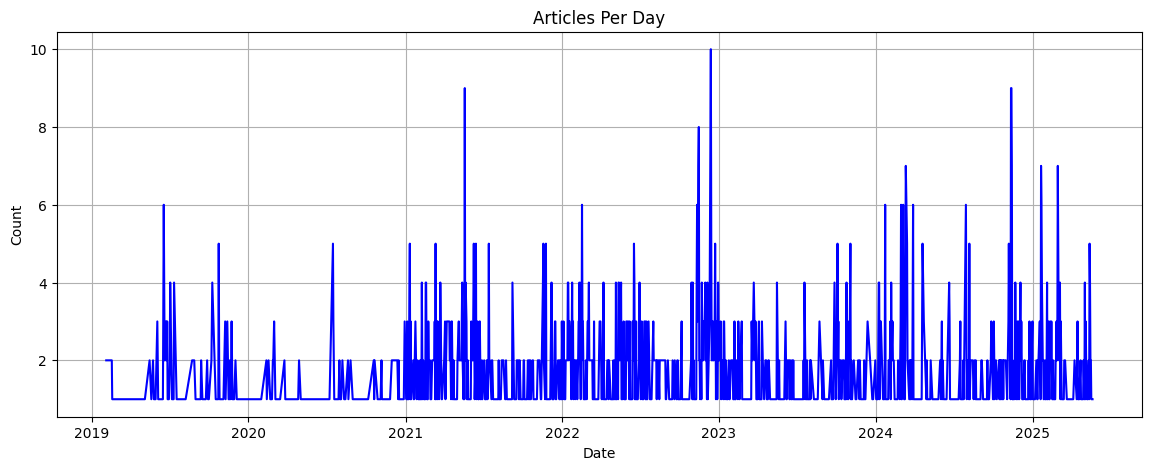

Days without articles: 1145


In [ ]:
import matplotlib.pyplot as plt

# Articles per day
daily_counts = df['published_date'].dt.date.value_counts().sort_index()
plt.figure(figsize=(14, 5))
daily_counts.plot(title='Articles Per Day', color='blue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Identify gaps
missing_dates = pd.date_range(
    start=df['published_date'].min(),
    end=df['published_date'].max()
).difference(df['published_date'])
print(f"Days without articles: {len(missing_dates)}")

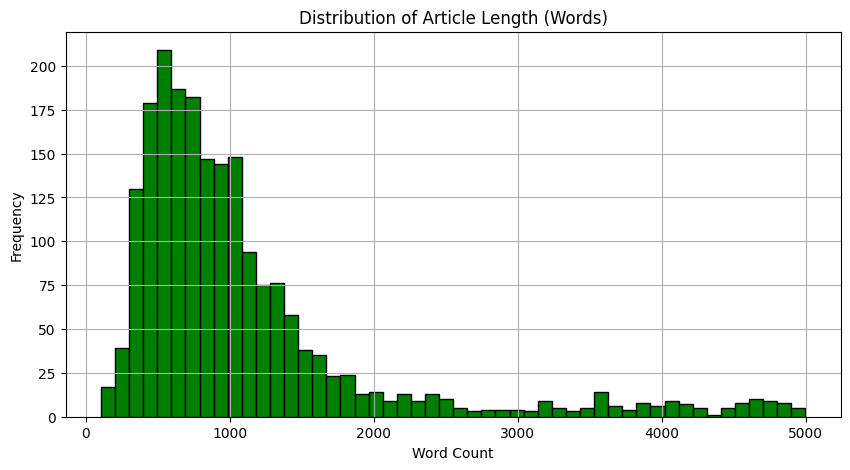

Median word count: 842.0


In [ ]:
# Word count analysis
plt.figure(figsize=(10, 5))
df['word_count'].hist(bins=50, color='green', edgecolor='black')
plt.title('Distribution of Article Length (Words)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

print(f"Median word count: {df['word_count'].median()}")

In [ ]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Extract top keywords
words = ' '.join(df['clean_title']).split()
filtered_words = [w for w in words if w not in stopwords.words('english')]
keyword_counts = Counter(filtered_words).most_common(20)

print("Top 20 Keywords:")
for word, count in keyword_counts:
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 Keywords:
crypto: 201
us: 162
bitcoin: 136
happened: 123
cryptocurrency: 120
trump: 114
uk: 110
new: 89
says: 82
sam: 71
ftx: 71
bankmanfried: 65
first: 63
briefing: 57
musk: 56
tech: 55
elon: 55
review: 51
mail: 49
trumps: 48


In [ ]:
# Sample random titles to manually verify sentiment
sample_titles = df.sample(10)[['title', 'section']]
print(sample_titles.to_markdown(index=False))

| title                                                                                                            | section    |
|:-----------------------------------------------------------------------------------------------------------------|:-----------|
| Cryptocurrency ethereum plans to cut carbon emissions by 99% with upgrade                                        | Technology |
| Sam Bankman-Fried is going to prison. The crypto industry isn’t any better for it                                | Global     |
| Musk’s new role in Trump’s government is today’s ‘ugh’ moment in US politics. There will be many more            | Opinion    |
| Bankrupt crypto exchange FTX ordered by US court to pay customers $12.7bn                                        | Business   |
| Leicester give their all to the very end but the richest clubs prevail                                           | Football   |
| Tracks of the week reviewed: Yungblud, Beabadoobee, Idles                               

In [ ]:
# Manually label a small subset for accuracy testing
calibration_samples = [
    ("Bitcoin soars to record high", "positive"),
    ("Crypto crash wipes out gains", "negative"),
    ("Blockchain adoption grows steadily", "neutral")
]

In [ ]:
import torch
print(torch.__version__)  # This should print the installed version of PyTorch


2.6.0+cu124


In [ ]:
!pip install vaderSentiment

In [ ]:
import os
import pandas as pd
import torch
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Check GPU availability
device = 0 if torch.cuda.is_available() else -1
print(f"Using {'GPU' if device == 0 else 'CPU'} for sentiment analysis")

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Load BERT model explicitly
bert_analyzer = pipeline('sentiment-analysis',
                         model="nlptown/bert-base-multilingual-uncased-sentiment",
                         device=device)

# Load FinBERT model explicitly
finbert_analyzer = pipeline("sentiment-analysis",
                             model="yiyanghkust/finbert-tone",
                             tokenizer="yiyanghkust/finbert-tone",
                             device=device)

# Function to get sentiment (Batch Processing)
def get_sentiment_batch(texts, use_finbert=False):
    """
    Perform batch sentiment analysis using VADER, BERT, and optionally FinBERT.
    Uses VADER if high confidence, else falls back to BERT or FinBERT.
    """
    sentiments = []
    confidence_scores = []

    # Step 1: Compute VADER scores for all texts
    vader_scores = [vader_analyzer.polarity_scores(text)['compound'] for text in texts]

    # Step 2: Identify texts needing BERT analysis (confidence < 0.7)
    texts_for_bert = [text for text, score in zip(texts, vader_scores) if abs(score) <= 0.7]

    # Step 3: Use BERT or FinBERT for low-confidence cases
    if texts_for_bert:
        if use_finbert:
            bert_results = finbert_analyzer(texts_for_bert)
        else:
            bert_results = bert_analyzer(texts_for_bert)

        bert_sentiments = [result['label'] for result in bert_results]
        bert_confidences = [result['score'] for result in bert_results]

    # Step 4: Assign results based on VADER or BERT/FinBERT
    bert_index = 0
    for text, score in zip(texts, vader_scores):
        if abs(score) > 0.7:
            sentiment = 'positive' if score > 0 else 'negative'
            confidence = abs(score)
        else:
            sentiment = bert_sentiments[bert_index]
            confidence = bert_confidences[bert_index]
            bert_index += 1

        sentiments.append(sentiment)
        confidence_scores.append(confidence)

    return sentiments, confidence_scores

# Example sentences for testing
test_sentences = [
    "Bitcoin is reaching new heights, and investors are excited.",
    "The recent drop in Bitcoin's price has caused panic among traders.",
    "Experts predict that Bitcoin will stabilize and grow in the coming months.",
    "Many believe that Bitcoin is a bubble waiting to burst.",
    "The adoption of Bitcoin by major companies is a positive sign for the market."
]

# Get sentiment for the test sentences using FinBERT
finbert_sentiments, finbert_confidences = get_sentiment_batch(test_sentences, use_finbert=True)

# Get sentiment for the test sentences using BERT
bert_sentiments, bert_confidences = get_sentiment_batch(test_sentences, use_finbert=False)

# Get sentiment for the test sentences using VADER
vader_scores = [vader_analyzer.polarity_scores(text)['compound'] for text in test_sentences]

# Display results
print("\nSentiment Analysis Results:")
for i, sentence in enumerate(test_sentences):
    print(f"\nSentence: {sentence}")
    print(f"VADER Sentiment: {'positive' if vader_scores[i] > 0 else 'negative' if vader_scores[i] < 0 else 'neutral'}, Score: {vader_scores[i]:.4f}")
    print(f"BERT Sentiment: {bert_sentiments[i]}, Confidence: {bert_confidences[i]:.4f}")
    print(f"FinBERT Sentiment: {finbert_sentiments[i]}, Confidence: {finbert_confidences[i]:.4f}")

Using CPU for sentiment analysis


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
Device set to use cpu



Sentiment Analysis Results:

Sentence: Bitcoin is reaching new heights, and investors are excited.
VADER Sentiment: positive, Score: 0.4939
BERT Sentiment: 5 stars, Confidence: 0.4236
FinBERT Sentiment: Positive, Confidence: 1.0000

Sentence: The recent drop in Bitcoin's price has caused panic among traders.
VADER Sentiment: negative, Score: -0.6597
BERT Sentiment: 2 stars, Confidence: 0.3889
FinBERT Sentiment: Negative, Confidence: 1.0000

Sentence: Experts predict that Bitcoin will stabilize and grow in the coming months.
VADER Sentiment: neutral, Score: 0.0000
BERT Sentiment: 3 stars, Confidence: 0.3453
FinBERT Sentiment: Positive, Confidence: 0.9986

Sentence: Many believe that Bitcoin is a bubble waiting to burst.
VADER Sentiment: neutral, Score: 0.0000
BERT Sentiment: 1 star, Confidence: 0.3913
FinBERT Sentiment: Negative, Confidence: 0.8101

Sentence: The adoption of Bitcoin by major companies is a positive sign for the market.
VADER Sentiment: positive, Score: 0.5574
BERT Sent

Conclusion
By leveraging VADER, BERT, and FinBERT, our project can achieve a comprehensive sentiment analysis framework that enhances our understanding of market trends and investor sentiment across Yahoo stocks, Wikipedia entries, and news articles. The varying strengths and accuracy levels of these models allow us to capture a wide range of sentiments effectively, ensuring that we derive meaningful insights from the data.

**Sentiment** **analysis**

In [ ]:
import pandas as pd
import numpy as np
from transformers import pipeline, AutoTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Initialize BERT sentiment analysis pipeline
device = 0 if torch.cuda.is_available() else -1  # Check if GPU is available, else use CPU
bert_analyzer = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Load the collected data (Guardian articles)
guardian_df = pd.read_csv("guardian_bitcoin_enhanced.csv")

# Convert the 'published_date' to datetime
guardian_df['published_date'] = pd.to_datetime(guardian_df['published_date'])

# Function to split text into chunks of 512 tokens (Sliding Window Approach)
def sliding_window_tokenize(text, max_length=512, stride=256):
    """
    Splits long text into overlapping chunks of tokens. Ensures that we do not exceed the max length for BERT.
    """
    # Tokenize the text using the BERT tokenizer
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=max_length)
    chunks = []

    # Create chunks using the sliding window approach
    for i in range(0, len(tokens), stride):
        chunk = tokens[i:i + max_length]
        if len(chunk) < max_length:
            chunks.append(chunk)
        else:
            chunks.append(chunk[:max_length])
    return chunks

# Function to get sentiment score using VADER and BERT (using sliding window)
def get_sentiment_score(text):
    # Get VADER sentiment score
    vader_score = vader_analyzer.polarity_scores(text)['compound']

    # Split the text into smaller chunks using the sliding window technique
    chunks = sliding_window_tokenize(text)

    # Get BERT sentiment score for each chunk and aggregate them
    bert_scores = []
    for chunk in chunks:
        chunk_text = tokenizer.decode(chunk, skip_special_tokens=True)
        bert_result = bert_analyzer(chunk_text)
        bert_score = bert_result[0]['score']
        sentiment = bert_result[0]['label']
        bert_scores.append(bert_score if sentiment == 'POSITIVE' else -bert_score)

    # Combine VADER and BERT sentiment scores, using VADER score as fallback if confidence is low in BERT
    if abs(vader_score) >= 0.7:
        return vader_score  # Use VADER score if it's more confident
    else:
        return np.mean(bert_scores)  # Return average BERT score for the chunks

# Apply sentiment score calculation to each article
guardian_df['sentiment_score'] = guardian_df['content'].apply(get_sentiment_score)

# 1. Count articles per day
daily_counts = guardian_df['published_date'].value_counts().sort_index()

# 2. Find days with no articles
date_range = pd.date_range(start=guardian_df['published_date'].min(), end=guardian_df['published_date'].max())
missing_days = [d.date() for d in date_range if d not in daily_counts.index]

# 3. Create a new DataFrame for sentiment analysis with default 0 (neutral) sentiment
sentiment_df = pd.DataFrame({'date': date_range, 'sentiment_score': 0})

# For each day, calculate the average sentiment score
for date in daily_counts.index:
    daily_articles = guardian_df[guardian_df['published_date'] == date]
    average_sentiment_score = daily_articles['sentiment_score'].mean()
    sentiment_df.loc[sentiment_df['date'] == date, 'sentiment_score'] = average_sentiment_score

# Merge the sentiment DataFrame with the original Guardian data
final_df = pd.merge(guardian_df, sentiment_df, left_on='published_date', right_on='date', how='left')

# Save the final DataFrame with sentiment data to a CSV
final_file_path = '/content/drive/MyDrive/Final_Project_Docs/guardian_bitcoin_with_sentiment.csv'
final_df.to_csv(final_file_path, index=False)

print("Data merged and saved successfully.")


Device set to use cpu


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the collected data (Guardian articles with sentiment scores)
guardian_df = pd.read_csv("/content/drive/MyDrive/Final_Project_Docs/guardian_bitcoin_with_sentiment.csv")

# Load the main financial data
main_df = pd.read_csv("/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_5_years.csv")  # Assuming you have this file as CSV

# Convert 'published_date' to datetime for Guardian data
guardian_df['published_date'] = pd.to_datetime(guardian_df['published_date'])

# 1. Calculate average sentiment for each day (if there are multiple articles)
guardian_df['date'] = guardian_df['published_date'].dt.date  # Extract date from the timestamp

# Calculate the daily average sentiment score for articles on that day
daily_sentiment = guardian_df.groupby('date')['sentiment_score_y'].mean().reset_index()  # Use sentiment_score_y

# 2. Merge with main financial dataset based on date
main_df['Date'] = pd.to_datetime(main_df['Date']).dt.date  # Ensure 'Date' in financial data is also in date format

# Merge the sentiment data with the financial data, filling missing values with 0 for days with no articles
final_df = pd.merge(main_df, daily_sentiment, left_on='Date', right_on='date', how='left')

# Fill missing sentiment values (days with no articles) with 0
final_df['sentiment_score_y'] = final_df['sentiment_score_y'].fillna(0)

# 3. Save the final DataFrame with sentiment to a new CSV file
final_file_path = '/content/drive/MyDrive/Final_Project_Docs/combined_financial_data_with_sentiment.csv'
final_df.to_csv(final_file_path, index=False)

print("Data merged and saved successfully.")


Data merged and saved successfully.


In [ ]:
# Drop the second 'date' column and keep the first one
final_df = final_df.drop(columns=['date'])

# Save the cleaned DataFrame to a new CSV file
final_file_path = '/content/drive/MyDrive/Final_Project_Docs/cleaned_financial_data_with_sentiment.csv'
final_df.to_csv(final_file_path, index=False)

print("Cleaned data saved successfully to new CSV file.")


Cleaned data saved successfully to new CSV file.


In [ ]:
import pandas as pd

# Load the final dataset
final_df = pd.read_csv("/content/drive/MyDrive/combined_financial_data_with_sentiment.csv")

# Print the first and last 20 rows to inspect the data
print("First 20 rows:")
print(final_df.head(20))

print("\nLast 20 rows:")
print(final_df.tail(20))




First 20 rows:
          Date  closing_price         High          Low         Open  \
0   2019-01-01    3843.520020  3850.913818  3707.231201  3746.713379   
1   2019-01-02    3943.409424  3947.981201  3817.409424  3849.216309   
2   2019-01-03    3836.741211  3935.685059  3826.222900  3931.048584   
3   2019-01-04    3857.717529  3865.934570  3783.853760  3832.040039   
4   2019-01-05    3845.194580  3904.903076  3836.900146  3851.973877   
5   2019-01-06    4076.632568  4093.297363  3826.513184  3836.519043   
6   2019-01-07    4025.248291  4092.613525  4020.894043  4078.584961   
7   2019-01-08    4030.847900  4109.020996  3996.955322  4028.472168   
8   2019-01-09    4035.296387  4068.403564  4022.662842  4031.552002   
9   2019-01-10    3678.924561  4064.066650  3659.174561  4034.411377   
10  2019-01-11    3687.365479  3713.881836  3653.069824  3674.015381   
11  2019-01-12    3661.301025  3698.978271  3653.810791  3686.973145   
12  2019-01-13    3552.953125  3674.760010  3544.

In [ ]:

# Basic information about the dataset
print("\nBasic information about the dataset:")
print(final_df.info())




Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2669 non-null   object 
 1   closing_price        2669 non-null   float64
 2   High                 2669 non-null   float64
 3   Low                  2669 non-null   float64
 4   Open                 2669 non-null   float64
 5   Volume               2669 non-null   int64  
 6   wikipedia_sentiment  2669 non-null   float64
 7   tomorrow_price       2668 non-null   float64
 8   date                 1432 non-null   object 
 9   sentiment_score_y    2669 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 208.6+ KB
None


In [ ]:

# Summary statistics
print("\nSummary statistics of the dataset:")
print(final_df.describe())




Summary statistics of the dataset:
       closing_price           High            Low           Open  \
count    2669.000000    2669.000000    2669.000000    2669.000000   
mean    35758.647635   36466.846977   34918.221495   35662.748390   
std     24280.051708   24774.552619   23715.390728   24264.180676   
min      3399.471680    3427.945557    3391.023682    3401.376465   
25%     13546.522461   13796.489258   13060.837891   13437.874023   
50%     35350.187500   36129.925781   33902.074219   35284.343750   
75%     49631.242188   50724.867188   48199.941406   49612.105469   
max    106146.265625  109114.882812  105291.734375  106147.296875   

             Volume  wikipedia_sentiment  tomorrow_price  sentiment_score_y  
count  2.669000e+03          2669.000000     2668.000000        2669.000000  
mean   3.033094e+10            -0.091474    35770.609827           0.053383  
std    1.926220e+10             0.079741    24276.735622           0.609010  
min    4.324201e+09           

In [ ]:

# Check for missing values
print("\nMissing values in the dataset:")
print(final_df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:")
print(final_df.duplicated().sum())




Missing values in the dataset:
Date                      0
closing_price             0
High                      0
Low                       0
Open                      0
Volume                    0
wikipedia_sentiment       0
tomorrow_price            1
date                   1237
sentiment_score_y         0
dtype: int64

Number of duplicate rows:
276


In [ ]:
# Drop the second 'date' column and keep the first one
final_df = final_df.drop(columns=['date'])

# Save the cleaned DataFrame to a new CSV file
final_file_path = '/content/drive/MyDrive/Final_Project_Docs/cleaned_financial_data_with_sentiment.csv'
final_df.to_csv(final_file_path, index=False)

print("Cleaned data saved successfully to new CSV file.")


Cleaned data saved successfully to new CSV file.


In [ ]:

# Check the distribution of the sentiment score
print("\nDistribution of sentiment scores:")
print(final_df['sentiment_score_y'].describe())



Distribution of sentiment scores:
count    2669.000000
mean        0.053383
std         0.609010
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.319867
max         1.000000
Name: sentiment_score_y, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the collected data (Guardian articles with sentiment scores)
final_df = pd.read_csv("/content/drive/MyDrive/Final_Project_Docs/cleaned_financial_data_with_sentiment.csv")

# Convert 'Date' to datetime for Guardian and financial data
final_df['Date'] = pd.to_datetime(final_df['Date'])

# 1. Check for duplicates and remove them
print("Checking for duplicates:")
duplicates = final_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
final_df = final_df.drop_duplicates()

# 2. Fill missing sentiment values with the previous day's non-zero sentiment
# We want to fill `sentiment_score_y` with the previous non-zero sentiment if the current is 0.
# We do it using forward fill but only if the previous value is not 0.

final_df['sentiment_score_y'] = final_df['sentiment_score_y'].replace(0, np.nan)  # Replace zero sentiment with NaN
final_df['sentiment_score_y'] = final_df['sentiment_score_y'].fillna(method='ffill')  # Forward fill

# 3. Check if the sentiment is still 0 (if no previous value was available)
final_df['sentiment_score_y'] = final_df['sentiment_score_y'].fillna(0)  # Replace NaN with 0 if no previous non-zero value exists

# 4. Check for missing values
print("\nMissing values in the dataset:")
print(final_df.isnull().sum())

# 5. Summary statistics
print("\nSummary statistics of the dataset:")
print(final_df.describe())

# 6. Check for any remaining duplicates after cleaning
print("\nChecking for duplicates after cleaning:")
duplicates_after_cleaning = final_df.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {duplicates_after_cleaning}")


Checking for duplicates:
Number of duplicate rows: 276

Missing values in the dataset:
Date                   0
closing_price          0
High                   0
Low                    0
Open                   0
Volume                 0
wikipedia_sentiment    0
tomorrow_price         1
sentiment_score_y      0
dtype: int64

Summary statistics of the dataset:
                                Date  closing_price           High  \
count                           2393    2393.000000    2393.000000   
mean   2022-03-22 12:50:50.898453760   34956.818903   35674.521555   
min              2019-01-01 00:00:00    3399.471680    3427.945557   
25%              2020-08-21 00:00:00   11322.123047   11528.189453   
50%              2022-04-11 00:00:00   29561.494141   30117.744141   
75%              2023-11-22 00:00:00   50822.195312   51950.027344   
max              2025-03-30 00:00:00  106146.265625  109114.882812   
std                              NaN   25081.260238   25599.943608   

        

<ipython-input-61-c77b7be14bd6>:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score_y'] = final_df['sentiment_score_y'].fillna(method='ffill')  # Forward fill


In [ ]:
# Save the cleaned data to a new CSV file
cleaned_file_path = '/content/drive/MyDrive/Final_Project_Docs/cleaned_financial_data_with_sentiment.csv'
final_df.to_csv(cleaned_file_path, index=False)

print("Cleaned data saved successfully.")


Cleaned data saved successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("\nSummary statistics of the dataset:")
print(final_df.describe())



Summary statistics of the dataset:
                                Date  closing_price           High  \
count                           2393    2393.000000    2393.000000   
mean   2022-03-22 12:50:50.898453760   34956.818903   35674.521555   
min              2019-01-01 00:00:00    3399.471680    3427.945557   
25%              2020-08-21 00:00:00   11322.123047   11528.189453   
50%              2022-04-11 00:00:00   29561.494141   30117.744141   
75%              2023-11-22 00:00:00   50822.195312   51950.027344   
max              2025-03-30 00:00:00  106146.265625  109114.882812   
std                              NaN   25081.260238   25599.943608   

                 Low           Open        Volume  wikipedia_sentiment  \
count    2393.000000    2393.000000  2.393000e+03          2393.000000   
mean    34128.047337   34912.254520  3.108645e+10            -0.092733   
min      3391.023682    3401.376465  4.324201e+09            -0.743000   
25%     11007.202148   11296.082031  

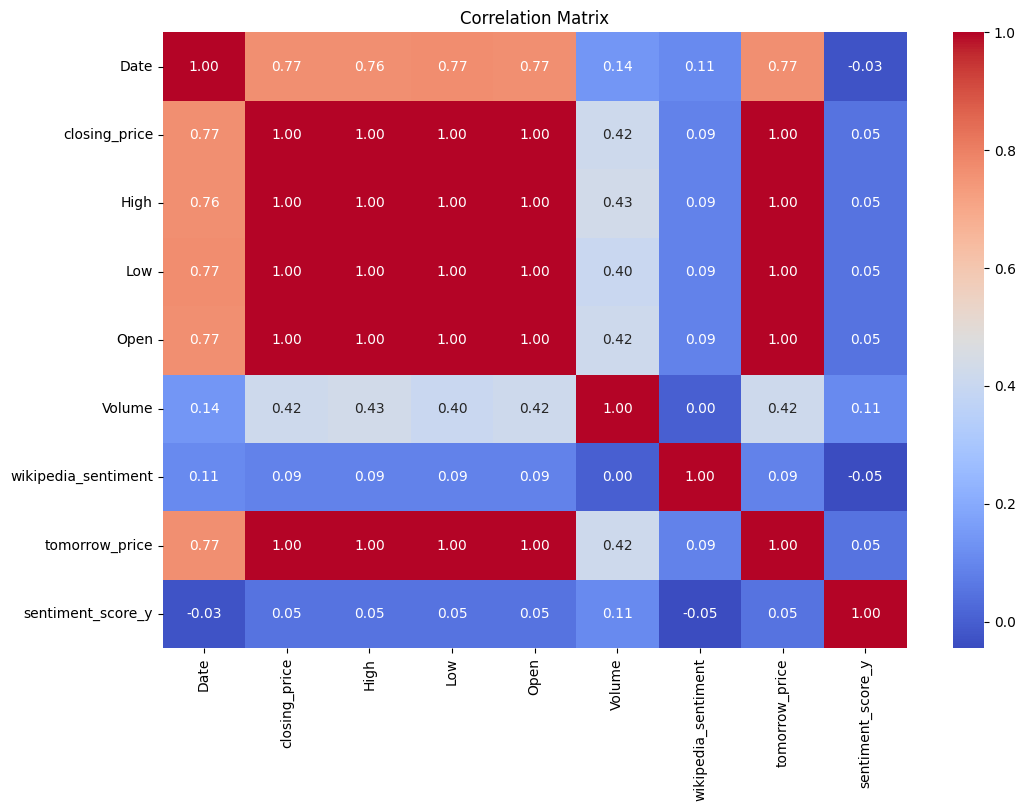

In [ ]:


#  Correlation matrix for numerical features
corr_matrix = final_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()




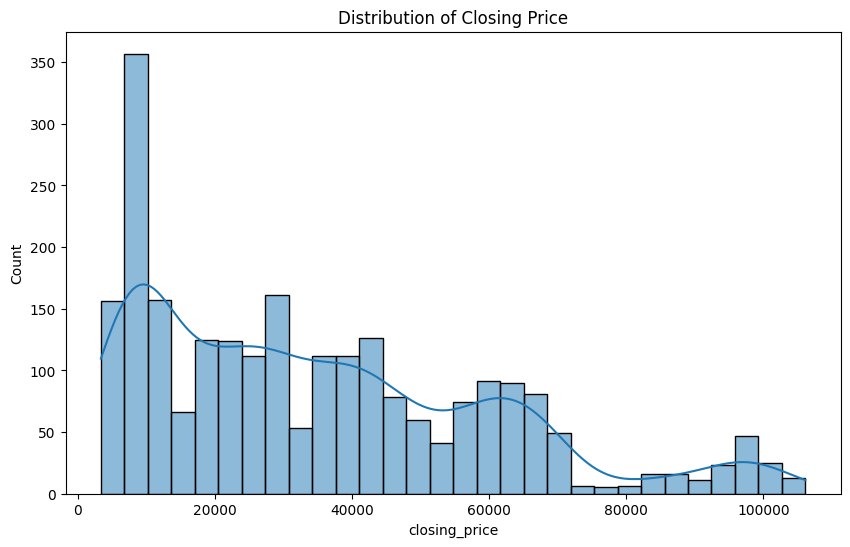

In [ ]:


#  Distribution of 'closing_price'
plt.figure(figsize=(10, 6))
sns.histplot(final_df['closing_price'], kde=True, bins=30)
plt.title('Distribution of Closing Price')
plt.show()



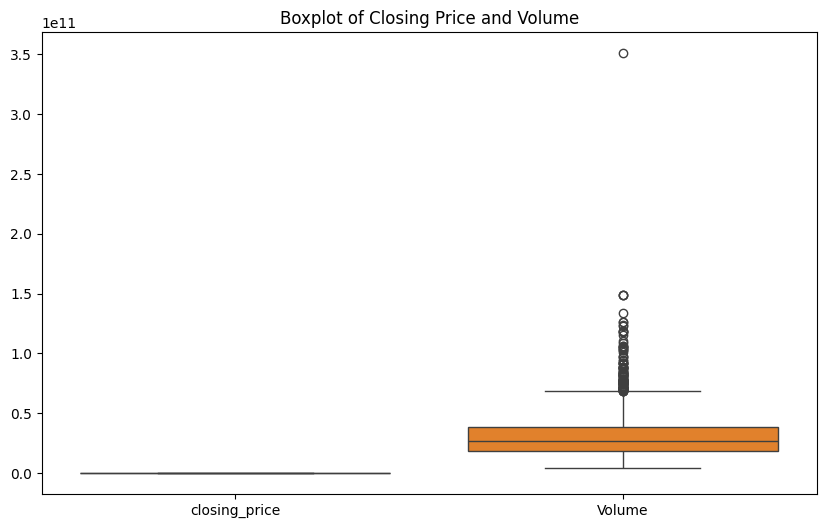

In [ ]:


#  Boxplot for `closing_price` and `Volume`
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df[['closing_price', 'Volume']])
plt.title('Boxplot of Closing Price and Volume')
plt.show()



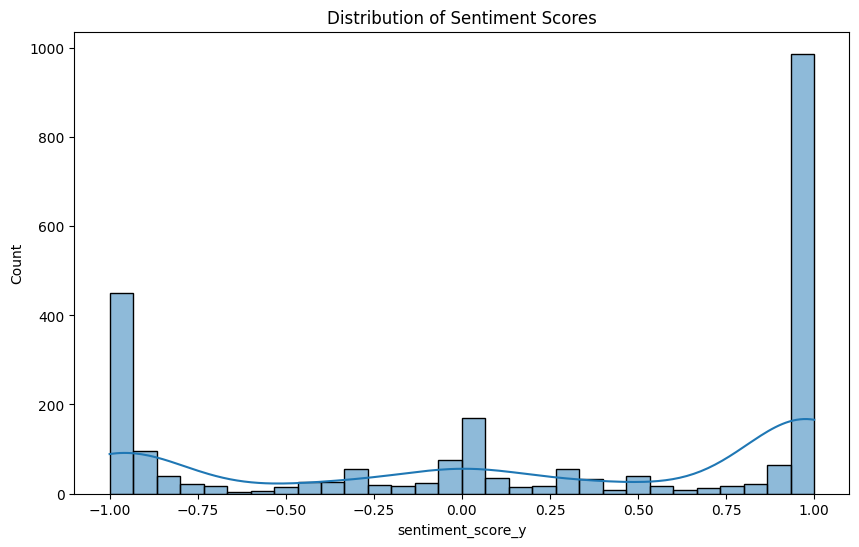

In [ ]:


#  Sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(final_df['sentiment_score_y'], kde=True, bins=30)
plt.title('Distribution of Sentiment Scores')
plt.show()



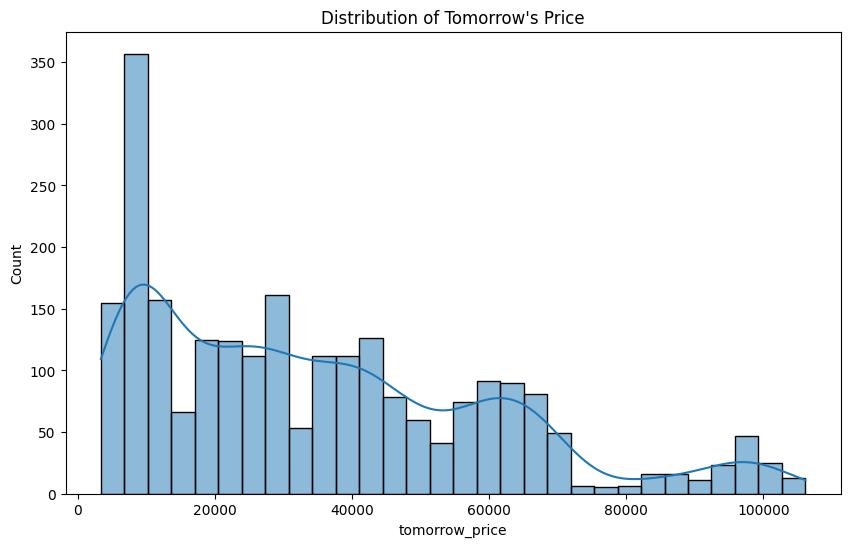

In [ ]:


#  Distribution of `tomorrow_price`
plt.figure(figsize=(10, 6))
sns.histplot(final_df['tomorrow_price'], kde=True, bins=30)
plt.title('Distribution of Tomorrow\'s Price')
plt.show()




In [ ]:


# Check for missing values after cleaning
print("\nMissing values in the dataset after cleaning:")
print(final_df.isnull().sum())




Missing values in the dataset after cleaning:
Date                   0
closing_price          0
High                   0
Low                    0
Open                   0
Volume                 0
wikipedia_sentiment    0
tomorrow_price         1
sentiment_score_y      0
dtype: int64


In [ ]:


#  Checking the number of duplicates after cleaning
duplicates_after_cleaning = final_df.duplicated().sum()
print(f"\nNumber of duplicate rows after cleaning: {duplicates_after_cleaning}")



Number of duplicate rows after cleaning: 0


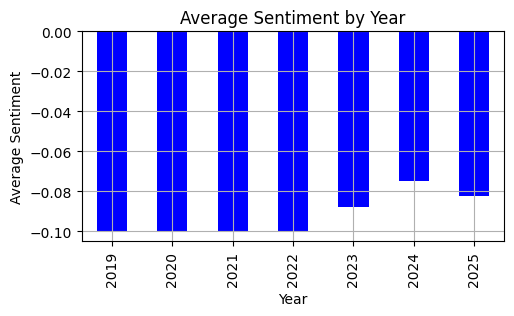

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your merged dataset
file_path = "/content/drive/MyDrive/Final_Project_Docs/cleaned_financial_data_with_sentiment.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Year', 'Month', and 'Weekday' columns for easy grouping
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['Weekend'] = df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 1. Sentiment by Year
sentiment_by_year = df.groupby('Year')['wikipedia_sentiment'].mean()

# 2. Sentiment by Month
sentiment_by_month = df.groupby('Month')['wikipedia_sentiment'].mean()

# 3. Sentiment by Weekday vs Weekend
sentiment_by_weekday = df.groupby('Weekend')['wikipedia_sentiment'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot Sentiment by Year
plt.subplot(2, 2, 1)
sentiment_by_year.plot(kind='bar', color='blue')
plt.title("Average Sentiment by Year")
plt.xlabel("Year")
plt.ylabel("Average Sentiment")
plt.grid(True)



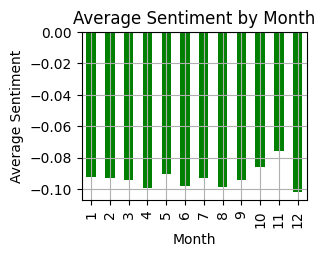

In [ ]:
# Plot Sentiment by Month
plt.subplot(2, 2, 2)
sentiment_by_month.plot(kind='bar', color='green')
plt.title("Average Sentiment by Month")
plt.xlabel("Month")
plt.ylabel("Average Sentiment")
plt.grid(True)



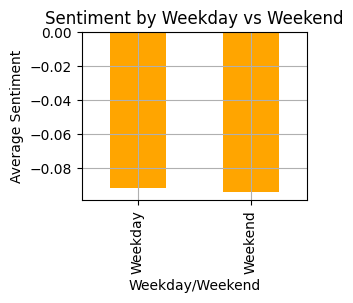

In [ ]:


# Plot Sentiment by Weekday vs Weekend
plt.subplot(2, 2, 3)
sentiment_by_weekday.plot(kind='bar', color='orange')
plt.title("Sentiment by Weekday vs Weekend")
plt.xlabel("Weekday/Weekend")
plt.ylabel("Average Sentiment")
plt.grid(True)




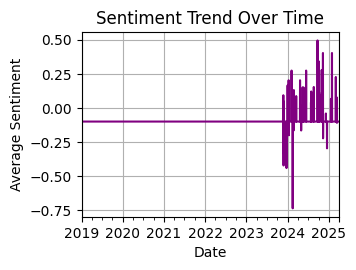

In [ ]:



# Sentiment over Time (Line Plot)
plt.subplot(2, 2, 4)
df.groupby('Date')['wikipedia_sentiment'].mean().plot(kind='line', color='purple')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.grid(True)

plt.tight_layout()
plt.show()




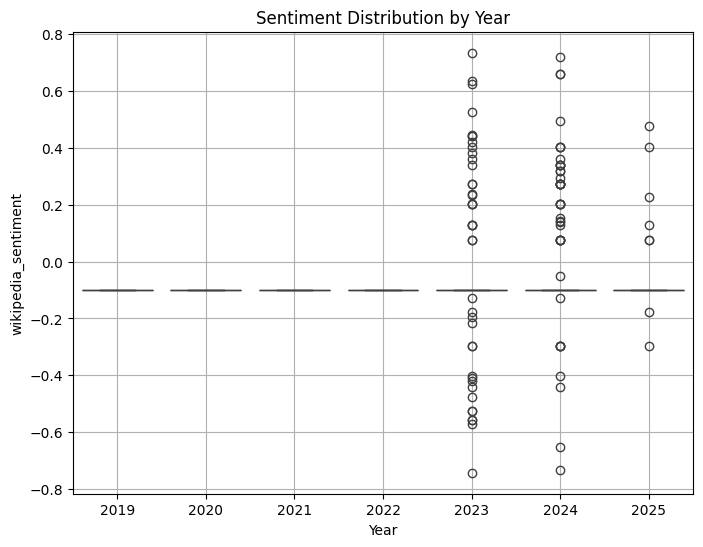

In [ ]:


# Boxplot for distribution of sentiment by Year
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='wikipedia_sentiment', data=df)
plt.title("Sentiment Distribution by Year")
plt.grid(True)
plt.show()


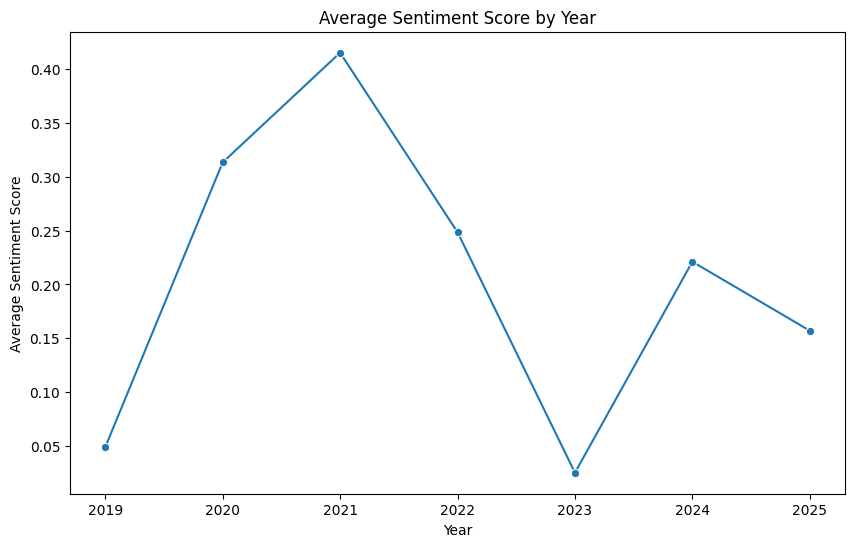

In [ ]:
# Extract the year from the 'Date' column
final_df['Year'] = pd.to_datetime(final_df['Date']).dt.year

# Average sentiment per year
sentiment_by_year = final_df.groupby('Year')['sentiment_score_y'].mean().reset_index()

# Plot sentiment by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_by_year, x='Year', y='sentiment_score_y', marker='o')
plt.title("Average Sentiment Score by Year")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.show()


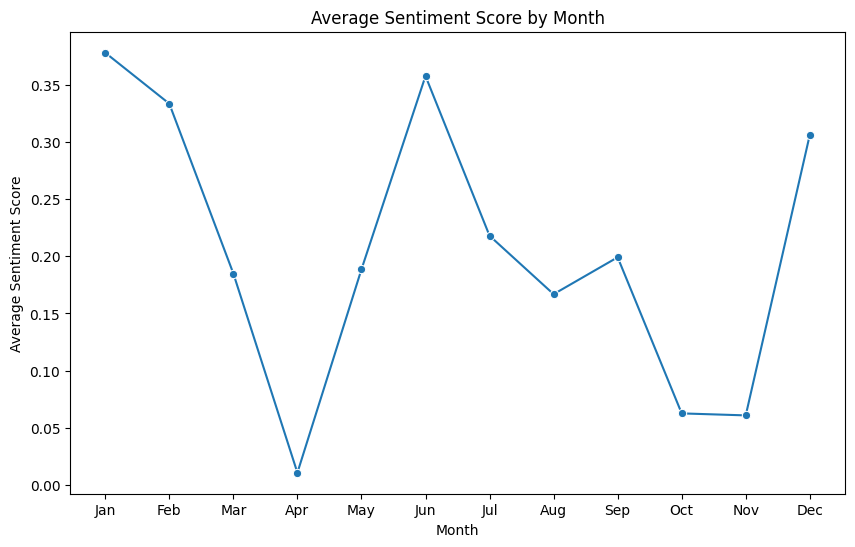

In [ ]:
# Extract the month from the 'Date' column
final_df['Month'] = pd.to_datetime(final_df['Date']).dt.month

# Average sentiment per month
sentiment_by_month = final_df.groupby('Month')['sentiment_score_y'].mean().reset_index()

# Plot sentiment by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_by_month, x='Month', y='sentiment_score_y', marker='o')
plt.title("Average Sentiment Score by Month")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.xticks(ticks=np.arange(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


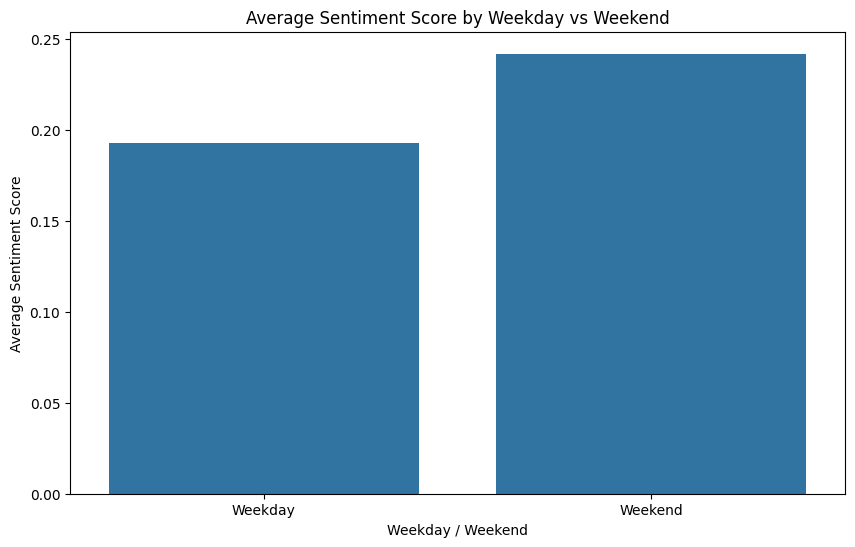

In [ ]:
# Extract the day of the week from the 'Date' column (0=Monday, 6=Sunday)
final_df['Weekday'] = pd.to_datetime(final_df['Date']).dt.weekday

# Create a new column to distinguish weekdays and weekends
final_df['Weekend'] = final_df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Average sentiment score by weekday/weekend
sentiment_by_weekday = final_df.groupby('Weekend')['sentiment_score_y'].mean().reset_index()

# Plot sentiment by weekday/weekend
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_by_weekday, x='Weekend', y='sentiment_score_y')
plt.title("Average Sentiment Score by Weekday vs Weekend")
plt.xlabel("Weekday / Weekend")
plt.ylabel("Average Sentiment Score")
plt.show()


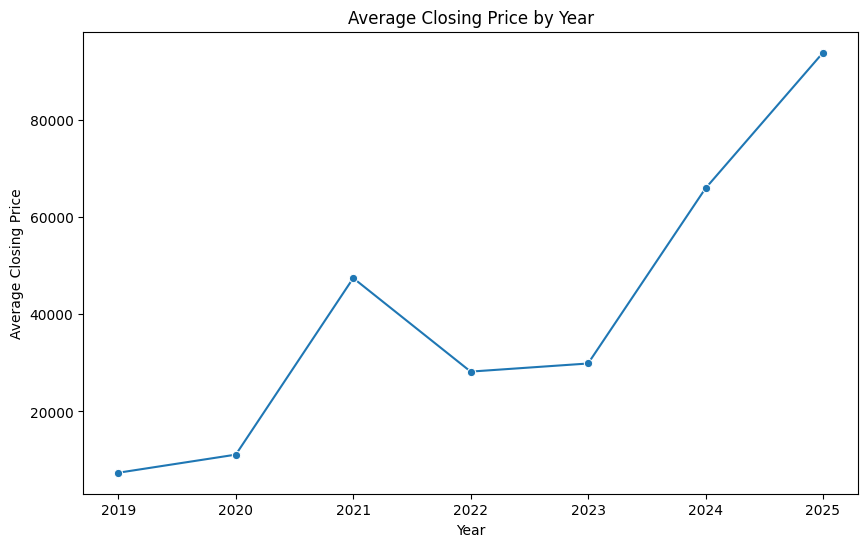

In [ ]:
# Average closing price by year
closing_price_by_year = final_df.groupby('Year')['closing_price'].mean().reset_index()

# Plot closing price by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=closing_price_by_year, x='Year', y='closing_price', marker='o')
plt.title("Average Closing Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.show()


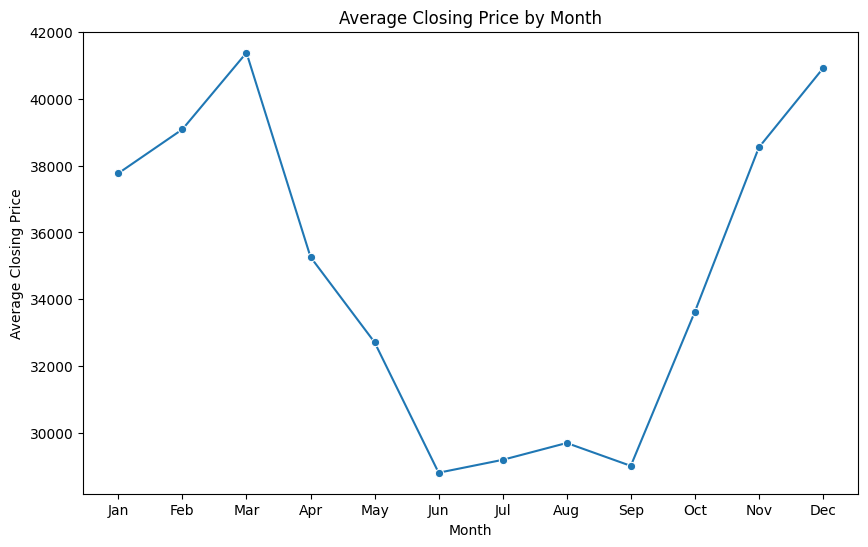

In [ ]:
# Average closing price by month
closing_price_by_month = final_df.groupby('Month')['closing_price'].mean().reset_index()

# Plot closing price by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=closing_price_by_month, x='Month', y='closing_price', marker='o')
plt.title("Average Closing Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.xticks(ticks=np.arange(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


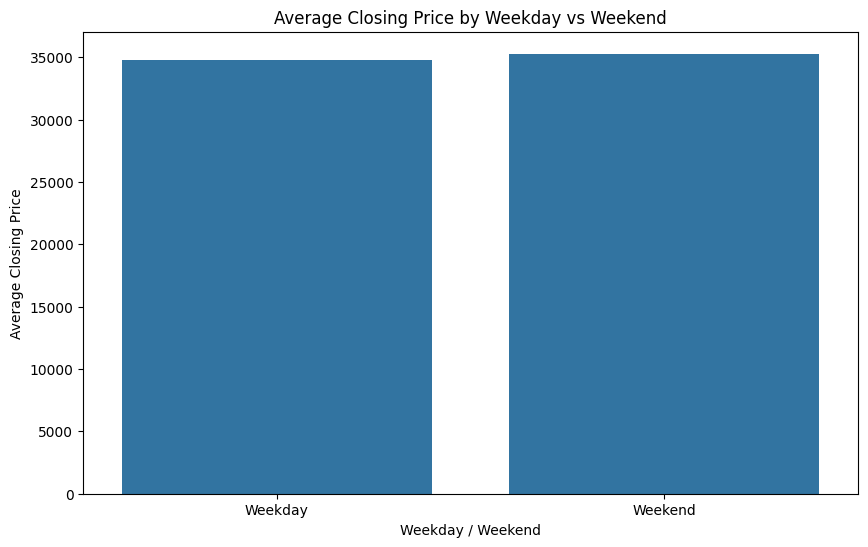

In [ ]:
# Average closing price by weekday/weekend
closing_price_by_weekday = final_df.groupby('Weekend')['closing_price'].mean().reset_index()

# Plot closing price by weekday/weekend
plt.figure(figsize=(10, 6))
sns.barplot(data=closing_price_by_weekday, x='Weekend', y='closing_price')
plt.title("Average Closing Price by Weekday vs Weekend")
plt.xlabel("Weekday / Weekend")
plt.ylabel("Average Closing Price")
plt.show()


In [ ]:
# Calculate the correlation between sentiment and closing price
sentiment_closing_corr = final_df['sentiment_score_y'].corr(final_df['closing_price'])

print(f"Correlation between Sentiment and Closing Price: {sentiment_closing_corr}")


Correlation between Sentiment and Closing Price: 0.05184030487513144


In [ ]:
# Calculate the correlation between sentiment and tomorrow's price
sentiment_tomorrow_corr = final_df['sentiment_score_y'].corr(final_df['tomorrow_price'])

print(f"Correlation between Sentiment and Tomorrow's Price: {sentiment_tomorrow_corr}")


Correlation between Sentiment and Tomorrow's Price: 0.05235583380174342


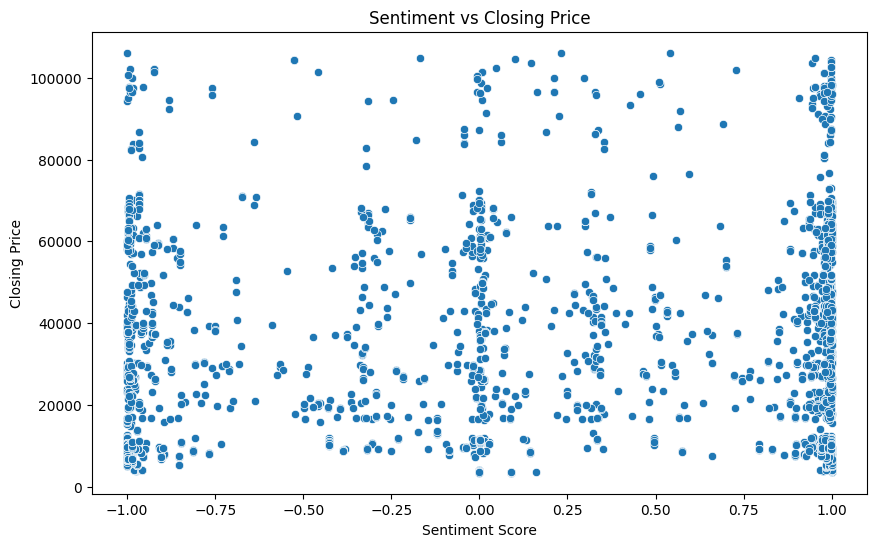

In [ ]:
# Plot sentiment vs closing price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='sentiment_score_y', y='closing_price')
plt.title("Sentiment vs Closing Price")
plt.xlabel("Sentiment Score")
plt.ylabel("Closing Price")
plt.show()


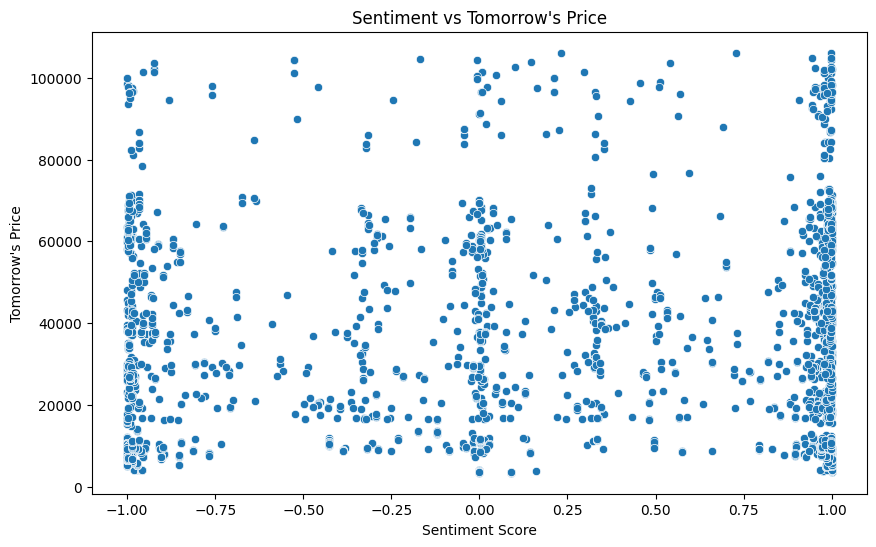

In [ ]:
# Plot sentiment vs tomorrow's price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='sentiment_score_y', y='tomorrow_price')
plt.title("Sentiment vs Tomorrow's Price")
plt.xlabel("Sentiment Score")
plt.ylabel("Tomorrow's Price")
plt.show()


In [ ]:
import pandas as pd

# Load the cleaned dataset
final_df = pd.read_csv('/content/drive/MyDrive/Final_Project_Docs/cleaned_financial_data_with_sentiment.csv')

# Drop rows where sentiment_score_y is 0 (prior to sentiment data)
final_df = final_df[final_df['sentiment_score_y'] != 0]

# Reset index to start from 0 for clean counting
final_df.reset_index(drop=True, inplace=True)

# Inspect the first few rows to ensure the data is correct
print(final_df.head())

# Check the total number of rows remaining
print(f"Number of rows after cleaning: {len(final_df)}")

# Check the structure of the dataset
print(final_df.info())

# Check for any missing values
print(final_df.isnull().sum())

# Save the cleaned dataset
final_df.to_csv('/content/drive/MyDrive/Final_Project_Docs/Final_cleaned_Bitcoin_data.csv', index=False)

print("Dataset cleaned and saved successfully.")


         Date  closing_price         High          Low         Open  \
0  2019-01-31    3457.792725  3504.804932  3447.915771  3485.409180   
1  2019-02-01    3487.945312  3501.954102  3431.591553  3460.547119   
2  2019-02-02    3521.060791  3523.287354  3467.574707  3484.625977   
3  2019-02-03    3464.013428  3521.388184  3447.924316  3516.139648   
4  2019-02-04    3459.154053  3476.223877  3442.586914  3467.211670   

       Volume  wikipedia_sentiment  tomorrow_price  sentiment_score_y  
0  5831198271                 -0.1     3487.945312             0.9998  
1  5422926707                 -0.1     3521.060791             0.9998  
2  5071623601                 -0.1     3464.013428             0.9998  
3  5043937584                 -0.1     3459.154053             0.9998  
4  5332718886                 -0.1     3466.357422             0.0884  
Number of rows after cleaning: 2363
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 9 columns):

In [ ]:
import pandas as pd
import numpy as np

#  Create lag feature (Previous day's closing price)
final_df['lag_1'] = final_df['closing_price'].shift(1)

# Calculate 30-Day Moving Average
final_df['30_MA'] = final_df['closing_price'].rolling(window=30).mean()

# Calculate 14-Day Relative Strength Index (RSI)
delta = final_df['closing_price'].diff()  # Change in price
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()  # Gain for positive changes
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()  # Loss for negative changes

# Avoid division by zero
rs = gain / loss
final_df['RSI_14'] = 100 - (100 / (1 + rs))

# Calculate MACD and Signal line
final_df['26_EMA'] = final_df['closing_price'].ewm(span=26, adjust=False).mean()
final_df['12_EMA'] = final_df['closing_price'].ewm(span=12, adjust=False).mean()
final_df['MACD'] = final_df['12_EMA'] - final_df['26_EMA']
final_df['MACD_signal'] = final_df['MACD'].ewm(span=9, adjust=False).mean()
final_df['MACD_histogram'] = final_df['MACD'] - final_df['MACD_signal']

# Calculate Bollinger Bands (Upper, Middle, and Lower)
final_df['30_MA'] = final_df['closing_price'].rolling(window=30).mean()  # Recalculating 30_MA here
final_df['30_STD'] = final_df['closing_price'].rolling(window=30).std()  # Standard deviation
final_df['Bollinger_upper'] = final_df['30_MA'] + (final_df['30_STD'] * 2)  # Upper Band
final_df['Bollinger_lower'] = final_df['30_MA'] - (final_df['30_STD'] * 2)  # Lower Band

# Fill missing values (forward fill)
final_df.fillna(method='ffill', inplace=True)

# Save the updated dataset with new features
final_file_path = '/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_with_features.csv'
final_df.to_csv(final_file_path, index=False)

# Display first few rows of the updated DataFrame
print("Data with features added successfully!")
print(final_df.head())


<ipython-input-87-6ad188f77552>:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df.fillna(method='ffill', inplace=True)


Data with features added successfully!
         Date  closing_price         High          Low         Open  \
0  2019-01-31    3457.792725  3504.804932  3447.915771  3485.409180   
1  2019-02-01    3487.945312  3501.954102  3431.591553  3460.547119   
2  2019-02-02    3521.060791  3523.287354  3467.574707  3484.625977   
3  2019-02-03    3464.013428  3521.388184  3447.924316  3516.139648   
4  2019-02-04    3459.154053  3476.223877  3442.586914  3467.211670   

       Volume  wikipedia_sentiment  tomorrow_price  sentiment_score_y  \
0  5831198271                 -0.1     3487.945312             0.9998   
1  5422926707                 -0.1     3521.060791             0.9998   
2  5071623601                 -0.1     3464.013428             0.9998   
3  5043937584                 -0.1     3459.154053             0.9998   
4  5332718886                 -0.1     3466.357422             0.0884   

         lag_1  30_MA  RSI_14       26_EMA       12_EMA      MACD  \
0          NaN    NaN     

In [ ]:
# Forward fill missing values
final_df.ffill(inplace=True)


In [ ]:
# Inspect the first few rows again
print(final_df.head())

# Check for any remaining missing values
print(final_df.isnull().sum())


         Date  closing_price         High          Low         Open  \
0  2019-01-31    3457.792725  3504.804932  3447.915771  3485.409180   
1  2019-02-01    3487.945312  3501.954102  3431.591553  3460.547119   
2  2019-02-02    3521.060791  3523.287354  3467.574707  3484.625977   
3  2019-02-03    3464.013428  3521.388184  3447.924316  3516.139648   
4  2019-02-04    3459.154053  3476.223877  3442.586914  3467.211670   

       Volume  wikipedia_sentiment  tomorrow_price  sentiment_score_y  \
0  5831198271                 -0.1     3487.945312             0.9998   
1  5422926707                 -0.1     3521.060791             0.9998   
2  5071623601                 -0.1     3464.013428             0.9998   
3  5043937584                 -0.1     3459.154053             0.9998   
4  5332718886                 -0.1     3466.357422             0.0884   

         lag_1  30_MA  RSI_14       26_EMA       12_EMA      MACD  \
0          NaN    NaN     NaN  3457.792725  3457.792725  0.000000

EDA

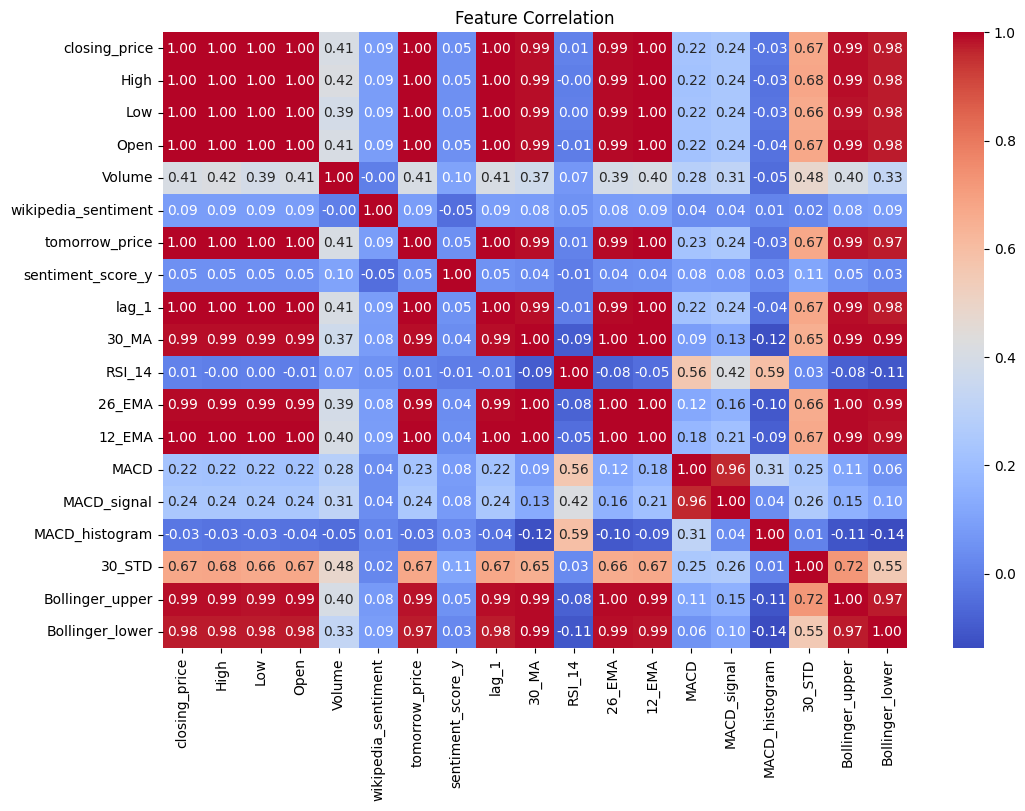

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation calculation
numerical_features = final_df.select_dtypes(include=np.number)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

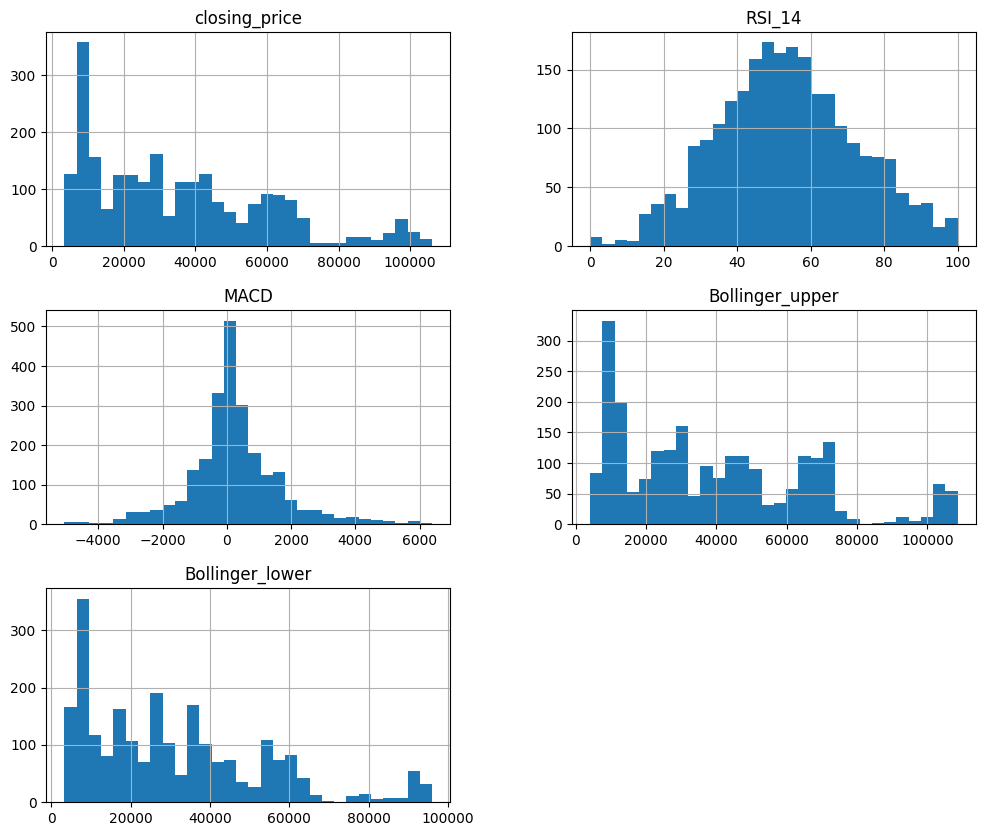

In [ ]:
final_df[['closing_price', 'RSI_14', 'MACD', 'Bollinger_upper', 'Bollinger_lower']].hist(bins=30, figsize=(12, 10))
plt.show()


Combine Sentiment Features

In [ ]:
print(final_df.columns)


Index(['Date', 'closing_price', 'High', 'Low', 'Open', 'Volume',
       'wikipedia_sentiment', 'tomorrow_price', 'sentiment_score_y', 'lag_1',
       '30_MA', 'RSI_14', '26_EMA', '12_EMA', 'MACD', 'MACD_signal',
       'MACD_histogram', '30_STD', 'Bollinger_upper', 'Bollinger_lower'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the existing dataset with features
final_df = pd.read_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_with_features.csv')

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Rescale the 'wikipedia_sentiment' and 'sentiment_score_y' to the range [0, 1]
final_df[['wikipedia_sentiment', 'sentiment_score_y']] = scaler.fit_transform(final_df[['wikipedia_sentiment', 'sentiment_score_y']])

# Calculate Composite Sentiment Score (weighted average of scaled Wikipedia sentiment and sentiment_score_y)
final_df['composite_sentiment'] = (final_df['wikipedia_sentiment'] + final_df['sentiment_score_y']) / 2

# Inspect the first few rows to ensure the composite sentiment is added correctly
print(final_df[['Date', 'wikipedia_sentiment', 'sentiment_score_y', 'composite_sentiment']].head())

# Save the updated dataset with composite sentiment
final_df.to_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_with_features_and_composite_sentiment.csv', index=False)

print("Composite sentiment feature added successfully!")


         Date  wikipedia_sentiment  sentiment_score_y  composite_sentiment
0  2019-01-31             0.435018             0.9999             0.717459
1  2019-02-01             0.435018             0.9999             0.717459
2  2019-02-02             0.435018             0.9999             0.717459
3  2019-02-03             0.435018             0.9999             0.717459
4  2019-02-04             0.435018             0.5442             0.489609
Composite sentiment feature added successfully!


In [ ]:
import pandas as pd

# Load the existing dataset with features
final_df = pd.read_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_data_with_features.csv')

# Calculate Composite Sentiment Score (weighted average of Wikipedia sentiment and sentiment_score_y)
final_df['composite_sentiment'] = (final_df['wikipedia_sentiment'] + final_df['sentiment_score_y']) / 2

# Inspect the first few rows to ensure the composite sentiment is added correctly
print(final_df[['Date', 'wikipedia_sentiment', 'sentiment_score_y', 'composite_sentiment']].head())

# Save the updated dataset with composite sentiment
final_df.to_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_with_features_and_composite_sentiment.csv', index=False)

print("Composite sentiment feature added successfully!")


         Date  wikipedia_sentiment  sentiment_score_y  composite_sentiment
0  2019-01-31                 -0.1             0.9998               0.4499
1  2019-02-01                 -0.1             0.9998               0.4499
2  2019-02-02                 -0.1             0.9998               0.4499
3  2019-02-03                 -0.1             0.9998               0.4499
4  2019-02-04                 -0.1             0.0884              -0.0058
Composite sentiment feature added successfully!


In [ ]:
# Create 7-day and 30-day rolling sentiment features
final_df['sentiment_7day'] = final_df['composite_sentiment'].rolling(window=7).mean()
final_df['sentiment_30day'] = final_df['composite_sentiment'].rolling(window=30).mean()


# Fill missing values (backfill for rolling windows)
final_df['sentiment_7day'] = final_df['sentiment_7day'].bfill()
final_df['sentiment_30day'] = final_df['sentiment_30day'].bfill()


# Inspect the first few rows to ensure everything is added correctly
print(final_df[['Date', 'composite_sentiment', 'sentiment_7day', 'sentiment_30day']].head())


         Date  composite_sentiment  sentiment_7day  sentiment_30day
0  2019-01-31               0.4499          0.2546         0.104453
1  2019-02-01               0.4499          0.2546         0.104453
2  2019-02-02               0.4499          0.2546         0.104453
3  2019-02-03               0.4499          0.2546         0.104453
4  2019-02-04              -0.0058          0.2546         0.104453


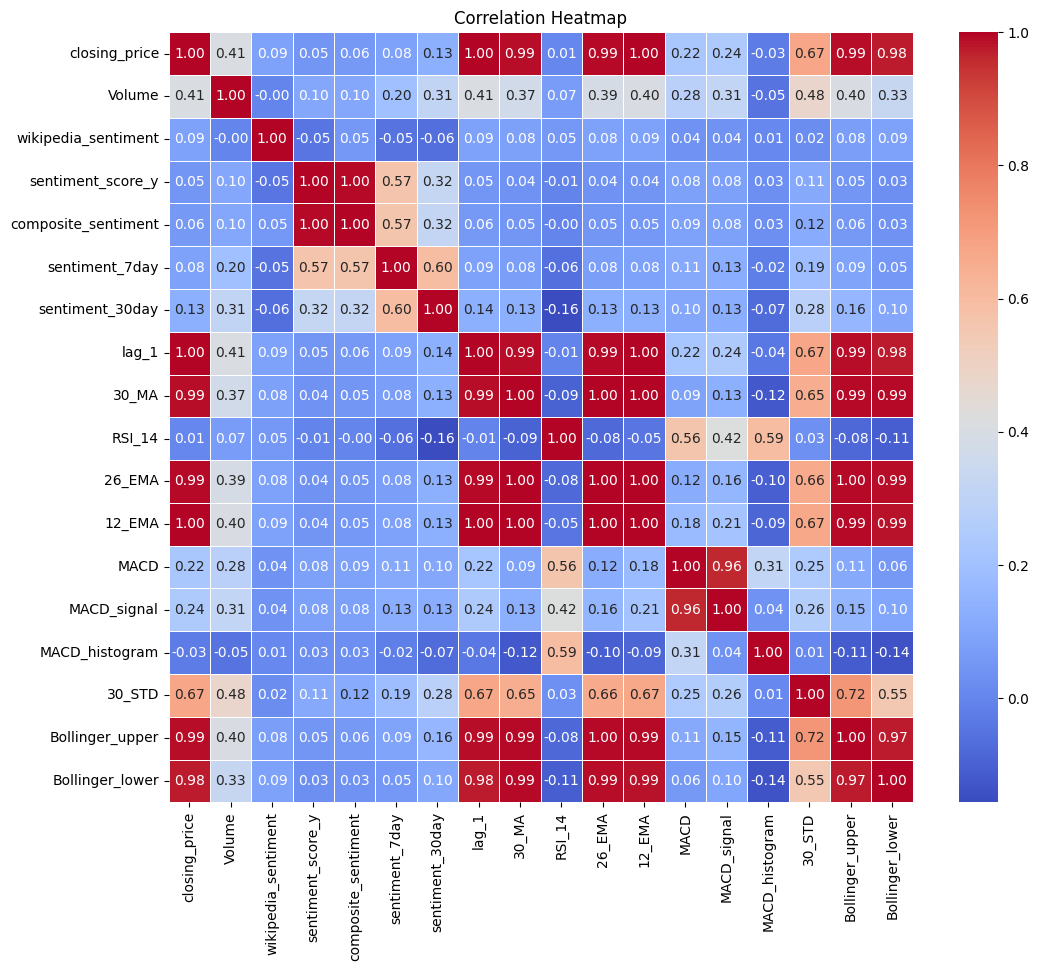

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns for correlation analysis
numeric_cols = ['closing_price', 'Volume', 'wikipedia_sentiment', 'sentiment_score_y', 'composite_sentiment',
                'sentiment_7day', 'sentiment_30day', 'lag_1', '30_MA', 'RSI_14', '26_EMA', '12_EMA', 'MACD',
                'MACD_signal', 'MACD_histogram', '30_STD', 'Bollinger_upper', 'Bollinger_lower']

# Calculate the correlation matrix
correlation_matrix = final_df[numeric_cols].corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


 EDA on Sentiment:

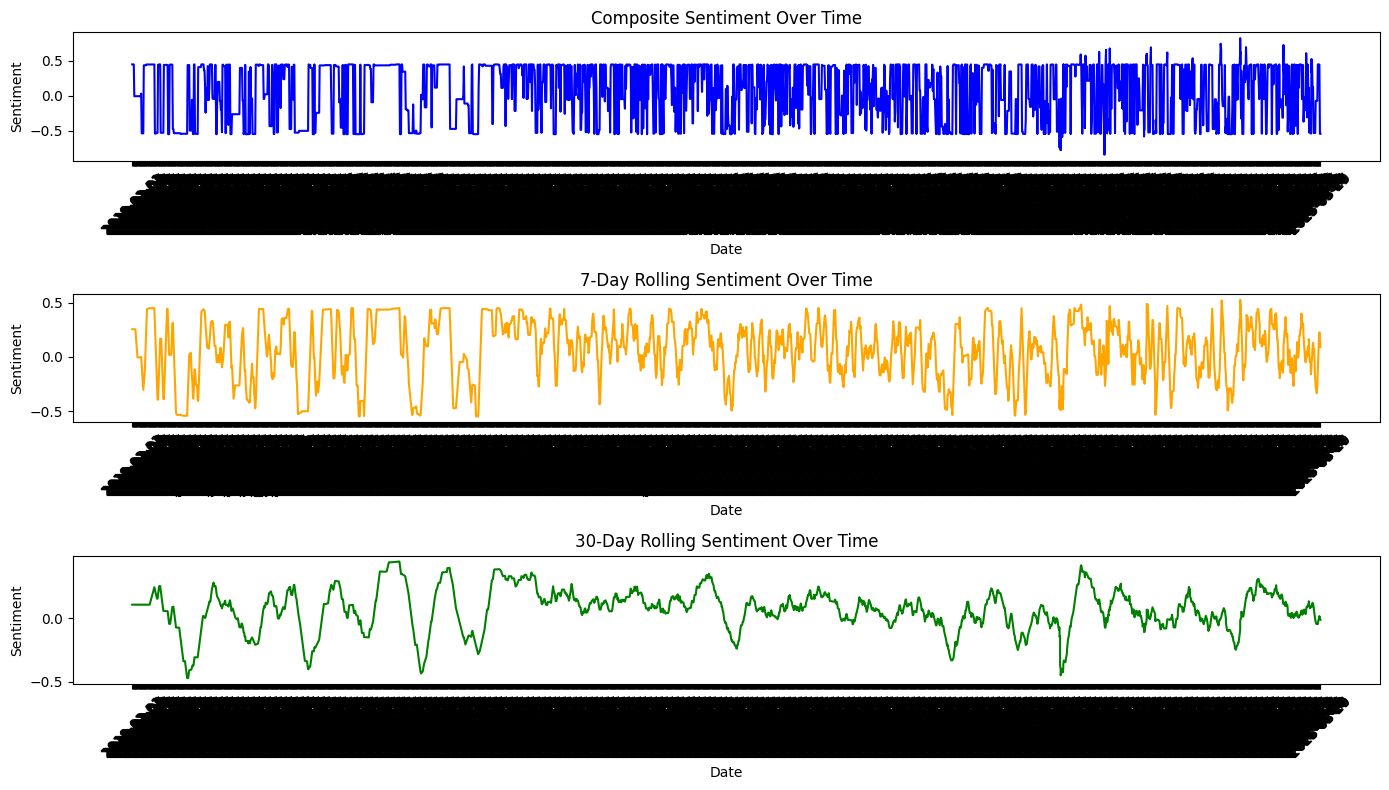

In [ ]:
import matplotlib.pyplot as plt

# Plot the sentiment features over time
plt.figure(figsize=(14, 8))

# Plot composite sentiment
plt.subplot(3, 1, 1)
plt.plot(final_df['Date'], final_df['composite_sentiment'], label='Composite Sentiment', color='blue')
plt.title('Composite Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)

# Plot 7-day rolling sentiment
plt.subplot(3, 1, 2)
plt.plot(final_df['Date'], final_df['sentiment_7day'], label='7-Day Rolling Sentiment', color='orange')
plt.title('7-Day Rolling Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)

# Plot 30-day rolling sentiment
plt.subplot(3, 1, 3)
plt.plot(final_df['Date'], final_df['sentiment_30day'], label='30-Day Rolling Sentiment', color='green')
plt.title('30-Day Rolling Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Get descriptive statistics for sentiment features
sentiment_stats = final_df[['composite_sentiment', 'sentiment_7day', 'sentiment_30day']].describe()
print(sentiment_stats)


       composite_sentiment  sentiment_7day  sentiment_30day
count          2363.000000     2363.000000      2363.000000
mean              0.058174        0.058423         0.059158
std               0.406654        0.263109         0.171537
min              -0.844300       -0.549750        -0.470390
25%              -0.396550       -0.119870        -0.021806
50%               0.157093        0.088702         0.074875
75%               0.444000        0.267775         0.165014
max               0.825725        0.525896         0.442518


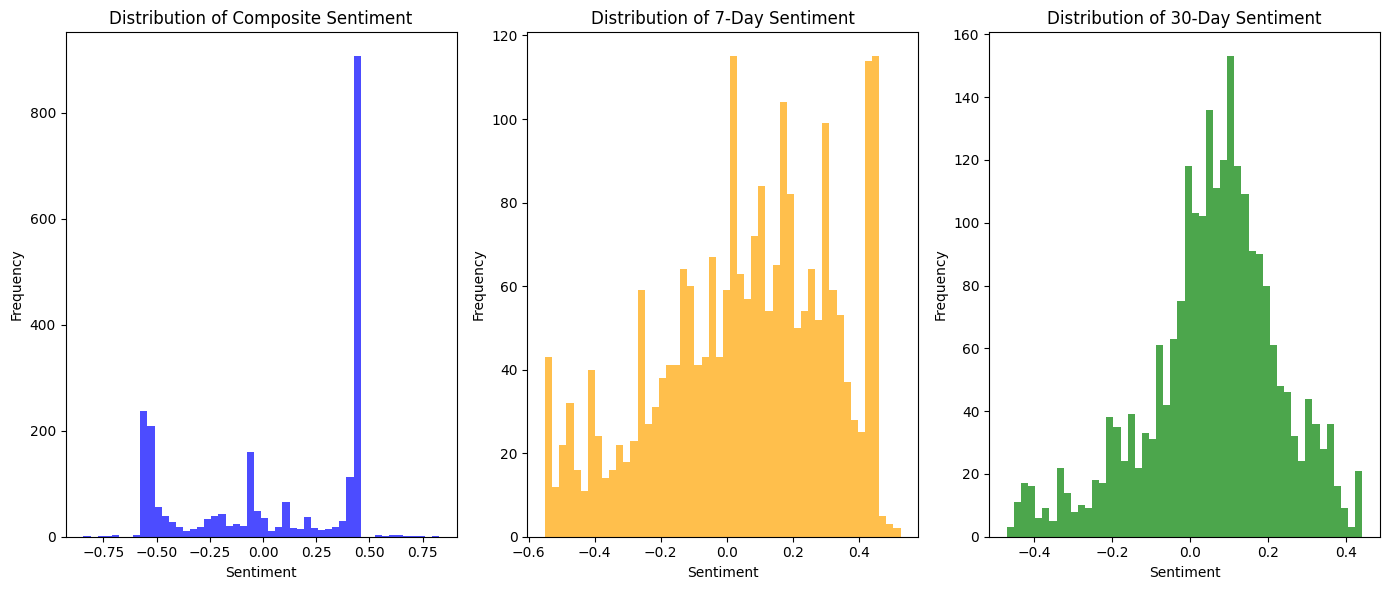

In [ ]:
# Plot the distribution of sentiment features
plt.figure(figsize=(14, 6))

# Histogram for composite sentiment
plt.subplot(1, 3, 1)
plt.hist(final_df['composite_sentiment'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Composite Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Histogram for 7-day sentiment
plt.subplot(1, 3, 2)
plt.hist(final_df['sentiment_7day'], bins=50, color='orange', alpha=0.7)
plt.title('Distribution of 7-Day Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Histogram for 30-day sentiment
plt.subplot(1, 3, 3)
plt.hist(final_df['sentiment_30day'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of 30-Day Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


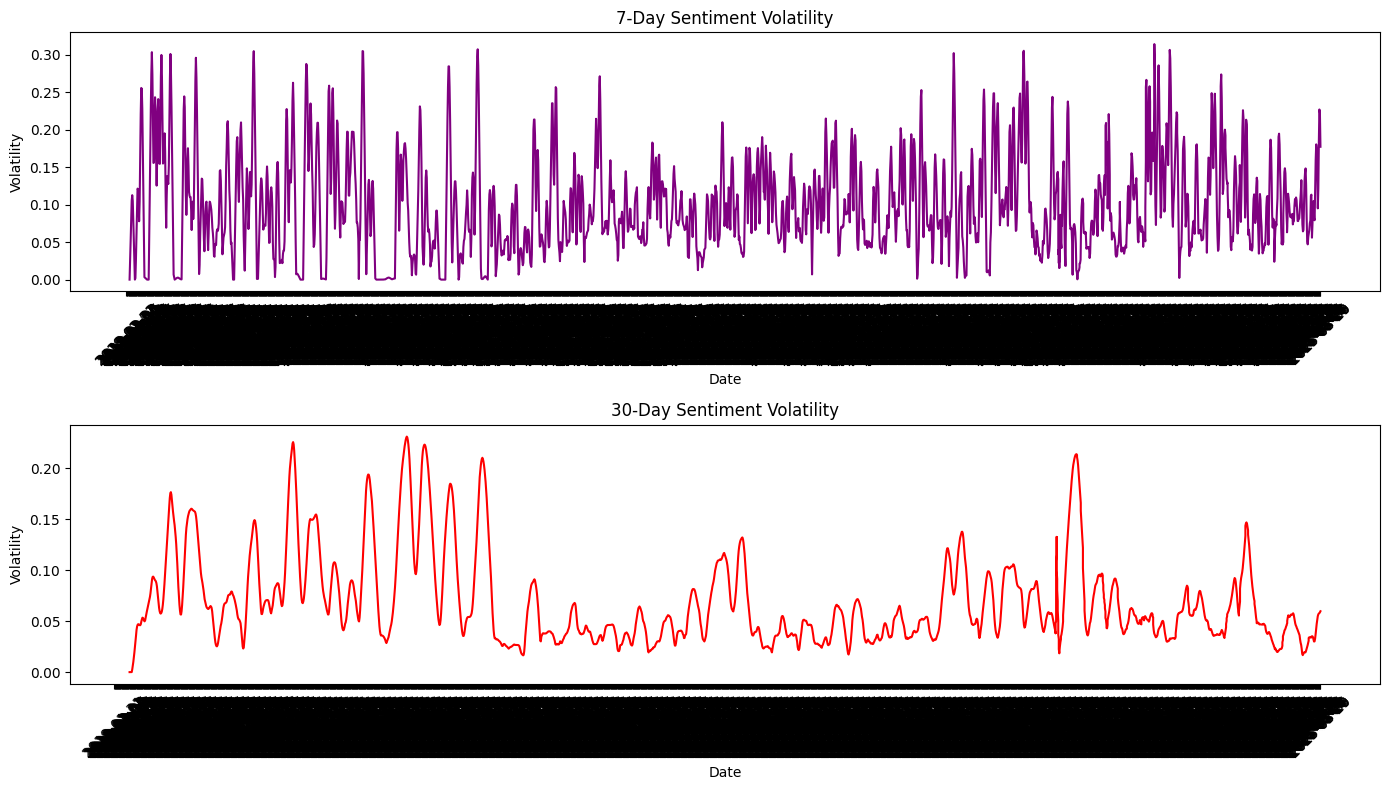

In [ ]:
# Calculate the 7-day and 30-day rolling volatility (std deviation)
final_df['sentiment_7day_volatility'] = final_df['sentiment_7day'].rolling(window=7).std()
final_df['sentiment_30day_volatility'] = final_df['sentiment_30day'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(14, 8))

# Plot 7-day sentiment volatility
plt.subplot(2, 1, 1)
plt.plot(final_df['Date'], final_df['sentiment_7day_volatility'], label='7-Day Sentiment Volatility', color='purple')
plt.title('7-Day Sentiment Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)

# Plot 30-day sentiment volatility
plt.subplot(2, 1, 2)
plt.plot(final_df['Date'], final_df['sentiment_30day_volatility'], label='30-Day Sentiment Volatility', color='red')
plt.title('30-Day Sentiment Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Binary Classification

We want to predict whether the Bitcoin price will increase tomorrow (1) or decrease (0).

Prepare the target variable: We'll create a binary target variable where 1 indicates an increase in price and 0 indicates a decrease.
Select features: Use the sentiment data and other technical indicators as features.
Train a Binary Classification Model: We'll use models like Logistic Regression, Random Forest, or XGBoost.
Evaluate the Model: We’ll use metrics like accuracy, precision, recall, and F1-score to evaluate the model's performance.

In [ ]:
import numpy as np
# Create a binary target variable
final_df['target'] = np.where(final_df['tomorrow_price'] > final_df['closing_price'], 1, 0)

# Display the first few rows to verify
print(final_df[['Date', 'closing_price', 'tomorrow_price', 'target']].head())


         Date  closing_price  tomorrow_price  target
0  2019-01-31    3457.792725     3487.945312       1
1  2019-02-01    3487.945312     3521.060791       1
2  2019-02-02    3521.060791     3464.013428       0
3  2019-02-03    3464.013428     3459.154053       0
4  2019-02-04    3459.154053     3466.357422       1


In [ ]:
# Select features for the model
features = ['composite_sentiment', 'sentiment_7day', 'sentiment_30day', 'lag_1', '30_MA', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_histogram']
X = final_df[features]
y = final_df['target']


In [ ]:
# Split the data into training and testing sets
split_date = '2024-01-01'  #use data before 2024-01-01 for training
train = final_df[final_df['Date'] < split_date]
test = final_df[final_df['Date'] >= split_date]

# Features and target for training and testing
X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.55
Precision: 0.47
Recall: 0.24
F1-Score: 0.32


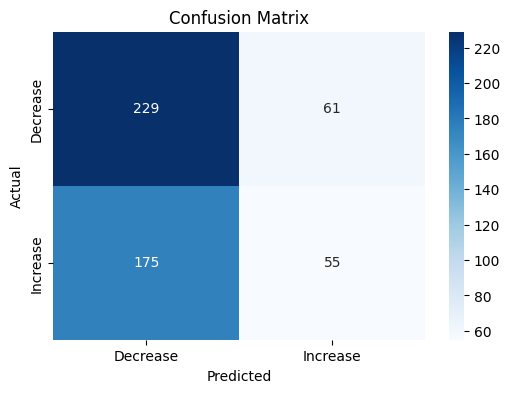

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Get feature importance from the trained model
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


               Feature  Importance
5               RSI_14    0.125222
1       sentiment_7day    0.121567
8       MACD_histogram    0.115214
2      sentiment_30day    0.113600
3                lag_1    0.113498
6                 MACD    0.107957
4                30_MA    0.107832
7          MACD_signal    0.103865
0  composite_sentiment    0.091245


Hyperparameter Tuning

In [ ]:
# Make copies to avoid SettingWithCopyWarning
X_train = X_train.copy()
X_test = X_test.copy()

# Recommended way to fill missing values in modern pandas
# For forward fill (ffill)
X_train['sentiment_7day'] = X_train['sentiment_7day'].ffill()
X_train['sentiment_30day'] = X_train['sentiment_30day'].ffill()

# For filling remaining NaN with 0 (without inplace)
X_train = X_train.assign(
    sentiment_7day=X_train['sentiment_7day'].fillna(0),
    sentiment_30day=X_train['sentiment_30day'].fillna(0)
)

# Apply the same for X_test
X_test['sentiment_7day'] = X_test['sentiment_7day'].ffill()
X_test['sentiment_30day'] = X_test['sentiment_30day'].ffill()

X_test = X_test.assign(
    sentiment_7day=X_test['sentiment_7day'].fillna(0),
    sentiment_30day=X_test['sentiment_30day'].fillna(0)
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train[features], y_train)

# Make predictions
y_pred_rf = rf.predict(X_test[features])

# Evaluate the model
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.57      0.79      0.66       290
           1       0.47      0.24      0.32       230

    accuracy                           0.55       520
   macro avg       0.52      0.51      0.49       520
weighted avg       0.53      0.55      0.51       520

Confusion Matrix (Random Forest):
 [[229  61]
 [175  55]]


**Fix Class** **Imbalance**

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Calculate class weights based on class frequency in your training data
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# Convert class weights to a dictionary (for XGBoost)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
# Train an XGBoost model with class weights
xgb_model = xgb.XGBClassifier(scale_pos_weight=class_weights_dict[1], random_state=42)  # Assuming 1 is your positive class label
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.56      0.70      0.62       290
           1       0.45      0.32      0.37       230

    accuracy                           0.53       520
   macro avg       0.51      0.51      0.50       520
weighted avg       0.51      0.53      0.51       520

[[202  88]
 [157  73]]


Key Insights:
The model is biasing toward predicting price decreases (Class 0). This is seen in the relatively high recall for Class 0 (70%) but poor recall for Class 1 (32%).
The model's precision for Class 1 (price increases) is quite low (45%), meaning when it predicts a price increase, it's incorrect half the time.
Recall for Class 1 is much worse at 32%, indicating that the model is missing a lot of price increases.
Accuracy is not a great measure here due to class imbalance; instead, precision, recall, and F1-scores are better indicators of performance, especially for Class 1.

Handle Class Imbalance with SMOTE and Class Weight

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Handle missing values by forward filling (you can also try backward filling or other strategies)
X_train.fillna(method='ffill', inplace=True)
X_test.fillna(method='ffill', inplace=True)

# Alternatively, fill remaining NaNs with 0 (if needed)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize Random Forest model with class weight to handle class imbalance
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on balanced data
rf_model_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = rf_model_smote.predict(X_test)

# Evaluate the model
print("Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix with SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))


<ipython-input-111-8e3f80a8457d>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train.fillna(method='ffill', inplace=True)
<ipython-input-111-8e3f80a8457d>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test.fillna(method='ffill', inplace=True)


Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       290
           1       0.44      0.31      0.36       230

    accuracy                           0.52       520
   macro avg       0.50      0.50      0.49       520
weighted avg       0.51      0.52      0.50       520

Confusion Matrix with SMOTE:
[[200  90]
 [159  71]]


Key Insights:
Class Imbalance: The model still heavily favors predicting Class 0 (Price Decreases). The recall for Class 0 is good (69%), but the recall for Class 1 (Price Increases) is much lower (31%).
Need for Improvement in Predicting Price Increases: The model needs to improve its ability to predict price increases, as evidenced by the low precision and recall for Class 1.

Add New Features

In [ ]:
# Add Price Change Percentage feature
final_df['price_change_percentage'] = (final_df['closing_price'] - final_df['lag_1']) / final_df['lag_1']

# Add Price Volatility (7-day and 30-day rolling standard deviation)
final_df['price_volatility_7day'] = final_df['closing_price'].rolling(window=7).std()
final_df['price_volatility_30day'] = final_df['closing_price'].rolling(window=30).std()

# Add Sentiment Momentum feature
final_df['sentiment_momentum'] = final_df['sentiment_7day'] - final_df['sentiment_30day']

# Add Interaction Features (Sentiment * RSI_14, Sentiment * MACD)
final_df['sentiment_7day_x_RSI_14'] = final_df['sentiment_7day'] * final_df['RSI_14']
final_df['sentiment_30day_x_MACD'] = final_df['sentiment_30day'] * final_df['MACD']

# Fill missing values in the newly created features (forward fill and zero where necessary)
final_df['price_volatility_7day'] = final_df['price_volatility_7day'].ffill().fillna(0)
final_df['price_volatility_30day'] = final_df['price_volatility_30day'].ffill().fillna(0)
final_df['sentiment_momentum'] = final_df['sentiment_momentum'].ffill().fillna(0)
final_df['sentiment_7day_x_RSI_14'] = final_df['sentiment_7day_x_RSI_14'].ffill().fillna(0)
final_df['sentiment_30day_x_MACD'] = final_df['sentiment_30day_x_MACD'].ffill().fillna(0)

# Save the updated dataset with the new features
final_df.to_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_with_new_features.csv', index=False)

print("New features added successfully!")


New features added successfully!


In [ ]:
# Create target variable for classification
final_df['target'] = np.where(final_df['tomorrow_price'] > final_df['closing_price'], 1, 0)

# Select features for the model
features = ['composite_sentiment', 'sentiment_7day', 'sentiment_30day', 'price_change_percentage',
            'price_volatility_7day', 'price_volatility_30day', 'sentiment_momentum',
            'sentiment_7day_x_RSI_14', 'sentiment_30day_x_MACD', 'lag_1', '30_MA', 'RSI_14',
            'MACD', 'MACD_signal', 'MACD_histogram']

# Define features and target
X = final_df[features]
y = final_df['target']

# Split data into training and testing sets
split_date = '2024-01-01'  # Use data before 2024-01-01 for training
train = final_df[final_df['Date'] < split_date]
test = final_df[final_df['Date'] >= split_date]

# Features and target for training and testing
X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.72      0.63       290
           1       0.46      0.30      0.37       230

    accuracy                           0.54       520
   macro avg       0.51      0.51      0.50       520
weighted avg       0.52      0.54      0.52       520

Confusion Matrix:
[[209  81]
 [160  70]]
                    Feature  Importance
3   price_change_percentage    0.082000
4     price_volatility_7day    0.072725
11                   RSI_14    0.072054
14           MACD_histogram    0.069588
7   sentiment_7day_x_RSI_14    0.069031
2           sentiment_30day    0.066802
9                     lag_1    0.066608
10                    30_MA    0.066442
6        sentiment_momentum    0.065890
5    price_volatility_30day    0.064250
8    sentiment_30day_x_MACD    0.062629
1            sentiment_7day    0.062149
13              MACD_signal    0.060440
12                     MACD    0.059919
0       c

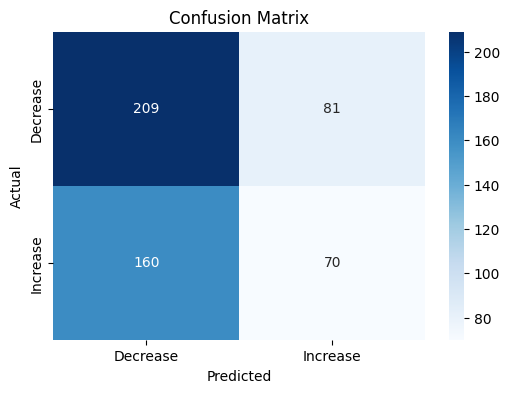

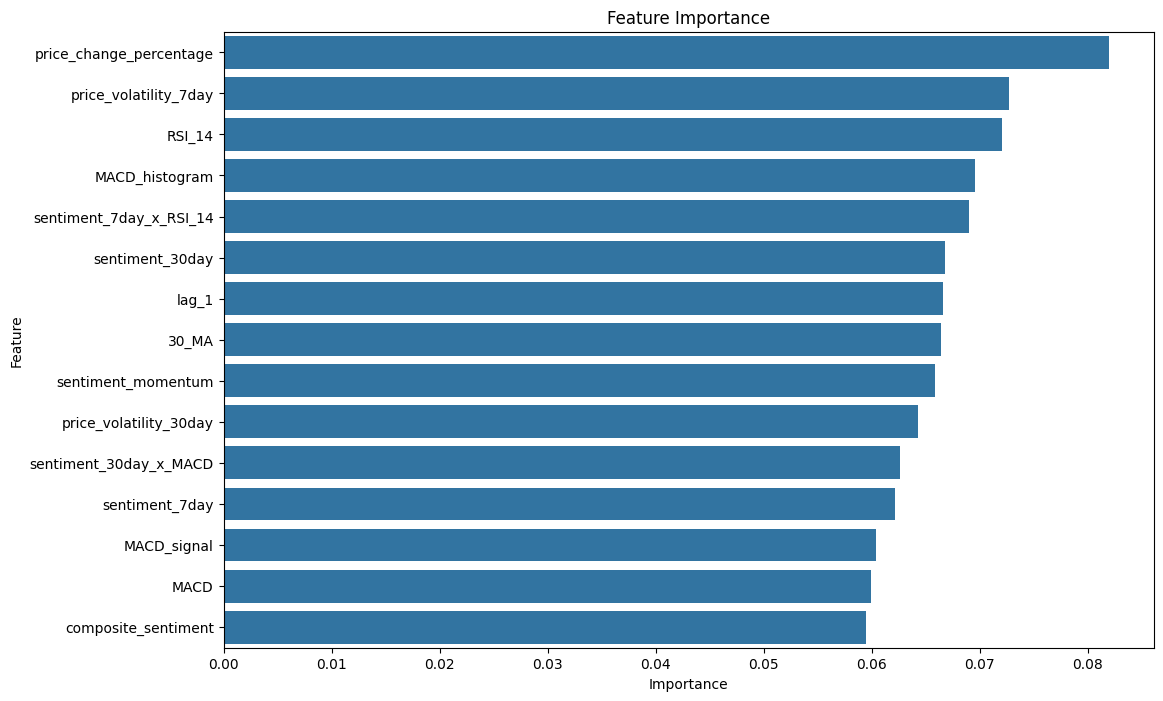

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


<ipython-input-116-b4d962de4c79>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method='ffill')  # Forward fill for X_train
<ipython-input-116-b4d962de4c79>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill')  # Forward fill for X_test


Missing values in X_train_smote: 0
Missing values in y_train_smote: 0
Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.57      0.71      0.64       290
           1       0.48      0.33      0.39       230

    accuracy                           0.54       520
   macro avg       0.53      0.52      0.51       520
weighted avg       0.53      0.54      0.53       520

Confusion Matrix with SMOTE:
[[207  83]
 [154  76]]


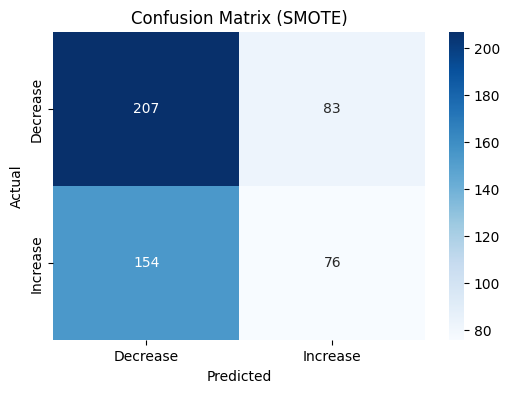

In [ ]:
# Fill missing values in the training data (X_train) and test data (X_test)
X_train = X_train.fillna(method='ffill')  # Forward fill for X_train
X_train = X_train.fillna(0)  # If any NaNs still exist, fill with 0
X_test = X_test.fillna(method='ffill')  # Forward fill for X_test
X_test = X_test.fillna(0)  # If any NaNs still exist, fill with 0

# Now proceed with applying SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check if any NaNs exist after SMOTE
print(f"Missing values in X_train_smote: {X_train_smote.isnull().sum().sum()}")
print(f"Missing values in y_train_smote: {y_train_smote.isnull().sum()}")

# Proceed with training the model using RandomForest
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model with class weights on the balanced data
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = rf_model_smote.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix with SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SMOTE)')
plt.show()


Address Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now we can re-train the model with this balanced dataset


In [ ]:
# Train Random Forest model with class_weight set to 'balanced'
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predict probabilities instead of classes
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Adjust threshold (e.g., if probability > 0.4, predict Class 1)
threshold = 0.4
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Evaluate the adjusted predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_adjusted))
print(confusion_matrix(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.54      0.31      0.40       290
           1       0.44      0.67      0.53       230

    accuracy                           0.47       520
   macro avg       0.49      0.49      0.46       520
weighted avg       0.50      0.47      0.46       520

[[ 91 199]
 [ 76 154]]


**Regression**

In regression, the target variable can be:

Percentage Change in Price: The percentage change between today's closing price and tomorrow's closing price.
Tomorrow’s Closing Price: The predicted price of Bitcoin for the next day.

In [ ]:
# Calculate the percentage change between closing price and the next day's closing price
final_df['price_change_pct'] = (final_df['tomorrow_price'] - final_df['closing_price']) / final_df['closing_price'] * 100

# Inspect the new target
print(final_df[['Date', 'closing_price', 'tomorrow_price', 'price_change_pct']].head())


         Date  closing_price  tomorrow_price  price_change_pct
0  2019-01-31    3457.792725     3487.945312          0.872018
1  2019-02-01    3487.945312     3521.060791          0.949427
2  2019-02-02    3521.060791     3464.013428         -1.620175
3  2019-02-03    3464.013428     3459.154053         -0.140282
4  2019-02-04    3459.154053     3466.357422          0.208241


In [ ]:
features = ['composite_sentiment', 'sentiment_7day', 'sentiment_30day', 'price_change_percentage',
            'price_volatility_7day', 'price_volatility_30day', 'sentiment_momentum',
            'sentiment_7day_x_RSI_14', 'sentiment_30day_x_MACD', 'lag_1', '30_MA', 'RSI_14',
            'MACD', 'MACD_signal', 'MACD_histogram']
X = final_df[features]
y = final_df['price_change_pct']


In [ ]:
# Split data into training and testing sets
split_date = '2024-01-01'  # Use data before 2024-01-01 for training
train = final_df[final_df['Date'] < split_date]
test = final_df[final_df['Date'] >= split_date]

# Features and target for training and testing
X_train = train[features]
y_train = train['price_change_pct']
X_test = test[features]
y_test = test['price_change_pct']


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_reg = rf_regressor.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
# Calculate RMSE using NumPy to ensure compatibility
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_reg)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error (MAE): 2.10
Mean Squared Error (MSE): 8.30
Root Mean Squared Error (RMSE): 2.88
R-squared: -0.23


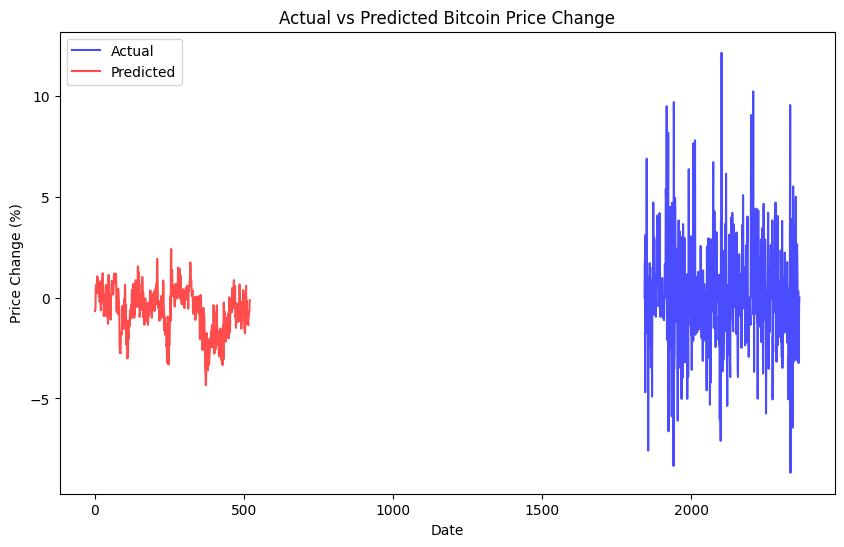

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred_reg, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Bitcoin Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - loss: 0.0184 - val_loss: 0.0069
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0025 - val_loss: 0.0072
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0022 - val_loss: 0.0065
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0020 - val_loss: 0.0142
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0018 - val_loss: 0.0061
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0017 - val_loss: 0.0112
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 0.0017 - val_loss: 0.0135
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0017 - val_loss: 0.0087
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0013 - val_loss: 0.0109
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0015 - val_loss: 0.0073
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - lo

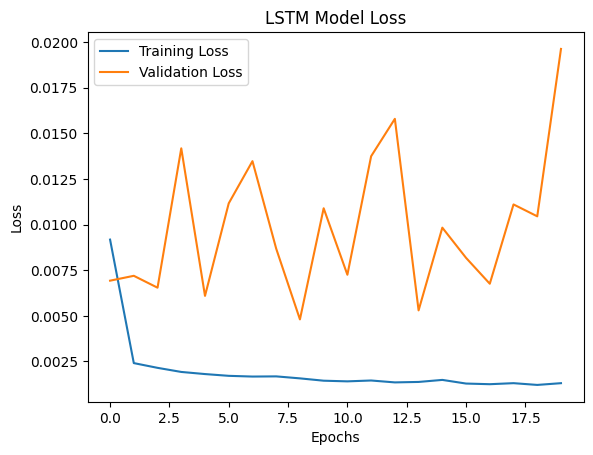

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


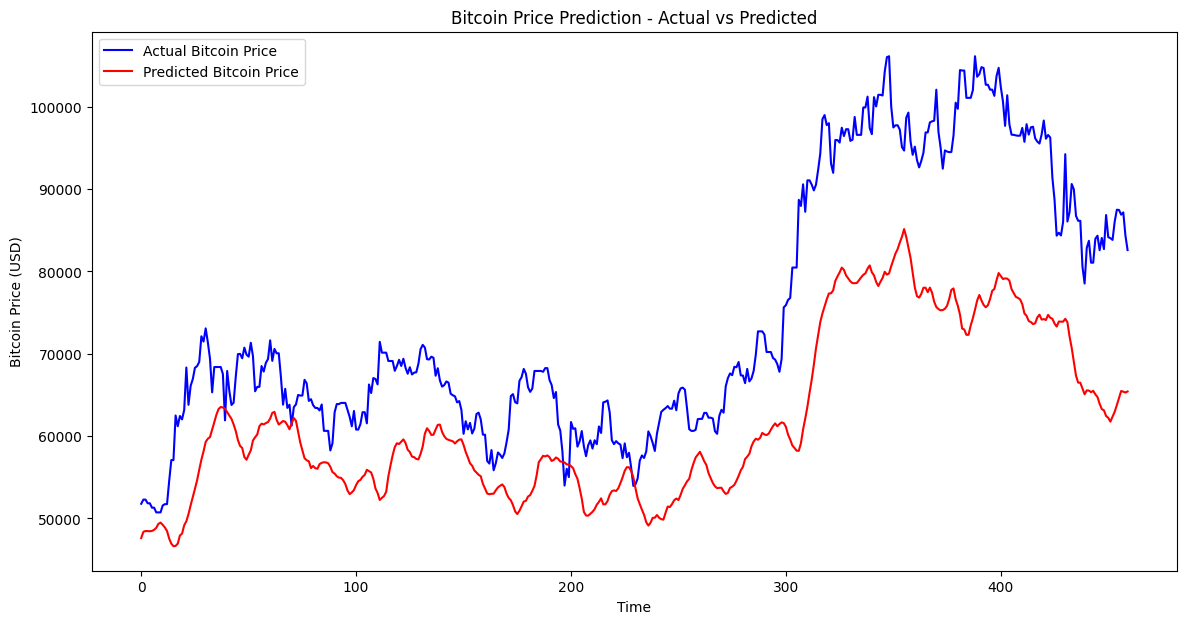

RMSE: 14394.295084548006


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split

# Assuming the merged data (final_df) is already available
# Selecting relevant features including sentiment columns
features = ['closing_price', 'Volume', 'wikipedia_sentiment', 'sentiment_score_y', 'tomorrow_price']
data = final_df[features]

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Function to create time-series sequences
def create_sequences(data, window_size=60, forecast_horizon=7):
    X = []
    y = []
    for i in range(window_size, len(data) - forecast_horizon):
        X.append(data[i - window_size:i, :])  # Previous 'window_size' days
        y.append(data[i + forecast_horizon - 1, 0])  # Next week's closing price
    return np.array(X), np.array(y)

# Create sequences for the model (window_size=60 for past 60 days)
window_size = 60
forecast_horizon = 7  # Predict the next 7 days' closing price
X, y = create_sequences(scaled_data, window_size, forecast_horizon)

# Train-test split (chronological split for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential()

# LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Bidirectional LSTM layer for better context
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))

# Output layer (single unit for next day's closing price)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model performance on the test set
predicted_prices = model.predict(X_test)

# Rescale the predicted prices back to the original scale
predicted_prices_rescaled = scaler.inverse_transform(np.concatenate((predicted_prices, np.zeros((predicted_prices.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Plot the predicted vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, color='blue', label='Actual Bitcoin Price')
plt.plot(predicted_prices_rescaled, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

# Calculate RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test_rescaled, predicted_prices_rescaled))
print(f"RMSE: {rmse}")


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_rescaled, predicted_prices_rescaled)
print(f"MAE: {mae}")


MAE: 12469.58169611845


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_rescaled, predicted_prices_rescaled)
print(f"R²: {r2}")


R²: 0.1469587509474758


In [ ]:
mape = np.mean(np.abs((y_test_rescaled - predicted_prices_rescaled) / y_test_rescaled)) * 100
print(f"MAPE: {mape}%")


MAPE: 15.765349942231252%


In [ ]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_test_rescaled, predicted_prices_rescaled))
print(f"RMSLE: {rmsle}")


RMSLE: 0.19302836730810013


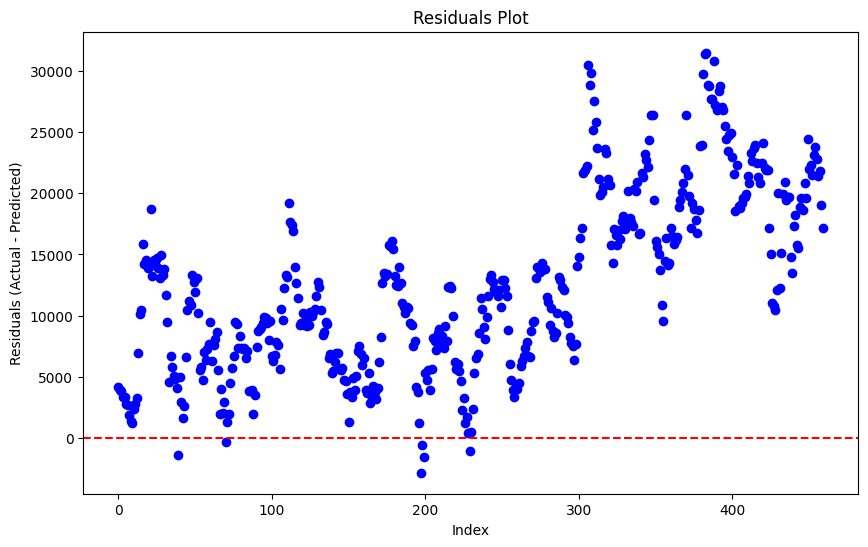

In [ ]:
residuals = y_test_rescaled - predicted_prices_rescaled

plt.figure(figsize=(10,6))
plt.scatter(range(len(residuals)), residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


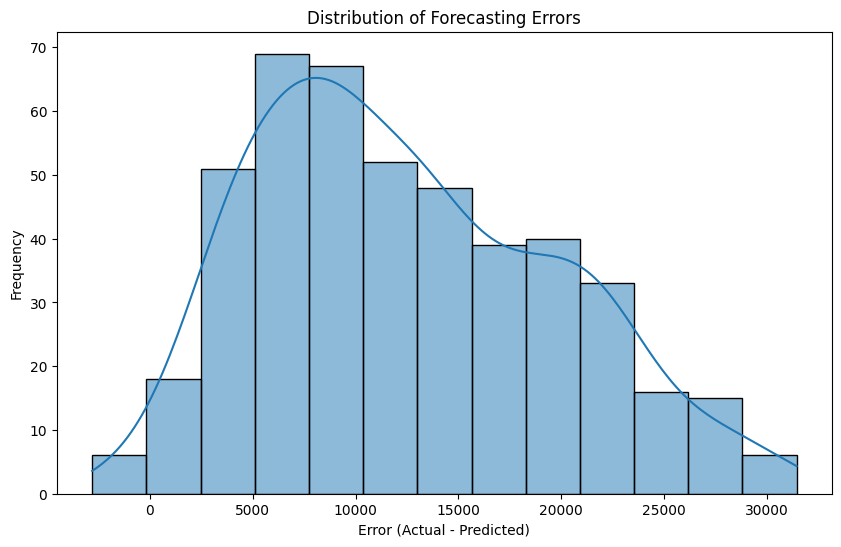

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Forecasting Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Flatten X_train for random forest input
rf_predictions = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

# Evaluate Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test_rescaled, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")


Random Forest RMSE: 76037.97063282202


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

# Define the model-building function
def build_model(hp):
    model = Sequential()

    # LSTM Layer 1
    model.add(LSTM(units=hp.Int('units_1', min_value=50, max_value=200, step=50),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # LSTM Layer 2
    model.add(LSTM(units=hp.Int('units_2', min_value=50, max_value=200, step=50),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense Output Layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')

    return model

# Initialize Keras Tuner
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=20,
                     factor=3,
                     directory='hyperparameter_tuning',
                     project_name='bitcoin_forecast')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


Trial 26 Complete [00h 04m 28s]
val_loss: 0.002374769188463688

Best val_loss So Far: 0.0022906207013875246
Total elapsed time: 00h 41m 04s

Search: Running Trial #27

Value             |Best Value So Far |Hyperparameter
50                |200               |units_1
0.2               |0.3               |dropout_1
200               |200               |units_2
0.3               |0.4               |dropout_2
adam              |rmsprop           |optimizer
20                |20                |tuner/epochs
0                 |7                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - loss: 0.0145 - val_loss: 0.0114
Epoch 2/20


In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on test data
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test_rescaled, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predicting on test data
y_pred = model.predict(X_test)

# Rescale predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], scaled_data.shape[1] - 1))), axis=1))[:,0]

# MAE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"RMSE: {rmse}")

# R²
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"R²: {r2}")

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
print(f"MAPE: {mape}%")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

# Load the enriched dataset
final_df = pd.read_csv('/content/drive/MyDrive/Final_Project_Docs/bitcoin_with_new_features.csv')

# Define features (using the new ones such as technical indicators and sentiment features)
features = ['composite_sentiment', 'sentiment_7day', 'sentiment_30day', 'sentiment_7day_volatility', 'sentiment_30day_volatility',
            'RSI_14', '30_MA', 'MACD', 'MACD_signal', 'MACD_histogram', '30_STD', 'Bollinger_upper', 'Bollinger_lower']

# Define the target (you can predict closing price or price change)
target = 'closing_price'  # You can change to 'tomorrow_price' or 'price_change_percentage' if needed

# Split the data into training and testing sets
X = final_df[features]
y = final_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error first
mse = mean_squared_error(y_test, predictions)
# Then calculate Root Mean Squared Error by taking the square root of MSE
rmse = np.sqrt(mse)

r2 = r2_score(y_test, predictions)
mape = (abs(y_test - predictions) / y_test).mean() * 100

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R²: {r2}')
print(f'MAPE: {mape}%')

In [ ]:
import pandas as pd

# Example of new data (make sure this follows the same format as your training data)
new_data = pd.DataFrame({
    'composite_sentiment': [0.45],  # Replace with your new sentiment value
    'sentiment_7day': [0.44],       # Replace with new 7-day sentiment value
    'sentiment_30day': [0.46],      # Replace with new 30-day sentiment value
    'sentiment_7day_volatility': [0.05],  # Replace with new sentiment volatility
    'sentiment_30day_volatility': [0.06], # Replace with new volatility
    'RSI_14': [55],                 # Replace with new RSI value
    '30_MA': [3500],                # Replace with new 30-day moving average
    'MACD': [0.02],                 # Replace with new MACD value
    'MACD_signal': [0.01],          # Replace with new MACD signal value
    'MACD_histogram': [0.001],      # Replace with new MACD histogram value
    '30_STD': [100],                # Replace with new standard deviation value
    'Bollinger_upper': [3600],      # Replace with new Bollinger upper value
    'Bollinger_lower': [3400]       # Replace with new Bollinger lower value
})

# Make prediction using the trained Random Forest model
new_predictions = model.predict(new_data)

# Output the predicted Bitcoin closing price
print(f'Predicted Bitcoin Closing Price: {new_predictions[0]}')


In [ ]:
# Assuming final_df is your dataframe containing the historical Bitcoin data

# Extract the last 7 rows (last week) for prediction
last_week_data = final_df.tail(7)

# Extract the most recent row (today's data) for prediction
today_data = final_df.tail(1)

# Prepare the feature columns for prediction (same as training data)
features = ['composite_sentiment', 'sentiment_7day', 'sentiment_30day',
            'sentiment_7day_volatility', 'sentiment_30day_volatility',
            'RSI_14', '30_MA', 'MACD', 'MACD_signal', 'MACD_histogram',
            '30_STD', 'Bollinger_upper', 'Bollinger_lower']

# Prepare data for last week's closing price predictions
X_last_week = last_week_data[features]

# Prepare data for today's closing price prediction
X_today = today_data[features]


In [ ]:
# Make predictions for the past week
predictions_last_week = model.predict(X_last_week)

# Make prediction for today's closing price
prediction_today = model.predict(X_today)

# Print predictions for the past week and today
print("Predicted Bitcoin Closing Prices for the Past Week:")
print(predictions_last_week)

print(f"\nPredicted Bitcoin Closing Price for Today: {prediction_today[0]}")


In [ ]:
# Extract the actual closing prices for the last week and today
actual_last_week = last_week_data['closing_price'].values
actual_today = today_data['closing_price'].values

# Compare predicted vs actual values for the past week
print("\nActual vs Predicted Closing Prices for the Past Week:")
for i, pred in enumerate(predictions_last_week):
    print(f"Day {i+1} - Predicted: {pred}, Actual: {actual_last_week[i]}")

# Compare predicted vs actual value for today
print(f"\nActual vs Predicted Closing Price for Today: Predicted: {prediction_today[0]}, Actual: {actual_today[0]}")


In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for the past week
plt.figure(figsize=(10, 5))
plt.plot(range(1, 8), actual_last_week, label="Actual", marker='o')
plt.plot(range(1, 8), predictions_last_week, label="Predicted", marker='x')
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.title("Actual vs Predicted Bitcoin Closing Prices (Past Week)")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for the past week
days = range(1, 8)
plt.figure(figsize=(10, 5))
plt.plot(days, actual_last_week, label="Actual", marker='o')
plt.plot(days, predictions_last_week, label="Predicted", marker='x')
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.title("Actual vs Predicted Bitcoin Closing Prices (Past Week)")
plt.legend()
plt.show()

# Plot for today
print(f"Predicted Bitcoin Closing Price for Today: {prediction_today[0]}")


In [ ]:
# Initialize an empty list to store the predictions
predicted_prices = []

# Get the latest data for prediction (the last row of the dataframe)
latest_data = final_df.tail(1)

# Loop through the next 7 days to predict the prices
for day in range(7):
    # Make a prediction for the next day
    prediction = model.predict(latest_data[features])
    predicted_prices.append(prediction[0])

    # Update the latest data with the predicted values
    latest_data['closing_price'] = prediction[0]  # Update closing price with prediction

    # Simulate the movement of other features for the next day (using rolling values or assumptions)
    latest_data['RSI_14'] = latest_data['RSI_14'] * 1.01  # Example: slightly increase RSI (you could use real logic here)
    latest_data['30_MA'] = latest_data['30_MA'] * 1.01  # Example: slightly increase 30-day moving average
    latest_data['MACD'] = latest_data['MACD'] * 1.01  # Simulate slight change in MACD
    latest_data['MACD_signal'] = latest_data['MACD_signal'] * 1.01  # Simulate MACD signal change
    latest_data['MACD_histogram'] = latest_data['MACD_histogram'] * 1.01  # Simulate MACD histogram change
    latest_data['Bollinger_upper'] = latest_data['Bollinger_upper'] * 1.01  # Simulate Bollinger Bands change
    latest_data['Bollinger_lower'] = latest_data['Bollinger_lower'] * 1.01  # Simulate lower Bollinger Bands change

    # You can implement more complex logic for technical indicators if necessary (e.g., using moving averages of recent data)

# Print predictions for the next 7 days
print("Predicted Bitcoin Closing Prices for the Next 7 Days:")
for i, price in enumerate(predicted_prices, 1):
    print(f"Day {i}: Predicted Closing Price: {price}")


In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted prices for the next 7 days
plt.figure(figsize=(10, 5))
plt.plot(range(1, 8), predicted_prices, marker='o', color='b', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Predicted Closing Price')
plt.title('Predicted Bitcoin Closing Prices for the Next 7 Days')
plt.legend()
plt.show()


In [ ]:
# Initialize an empty list to store the predictions
predicted_prices = []

# Get the latest data for prediction (the last row of the dataframe)
latest_data = final_df.tail(1)

# Loop through the next 7 days to predict the prices
for day in range(7):
    # Make a prediction for the next day
    prediction = model.predict(latest_data[features])
    predicted_prices.append(prediction[0])

    # Update the latest data with the predicted values (used for future predictions)
    latest_data['closing_price'] = prediction[0]  # Update closing price with prediction

    # Update the features for the next day (e.g., assume the sentiment and other features are updated)
    latest_data['RSI_14'] = latest_data['RSI_14'] * 1.01  # Example update, could be replaced with real logic
    latest_data['30_MA'] = latest_data['30_MA'] * 1.01  # Update 30-day moving average
    latest_data['MACD'] = latest_data['MACD'] * 1.01  # Update MACD

# Print predictions for the next 7 days
print("Predicted Bitcoin Closing Prices for the Next 7 Days:")
for i, price in enumerate(predicted_prices, 1):
    print(f"Day {i}: Predicted Closing Price: {price}")


In [ ]:

# Calculate the daily price changes (increase or decrease)
price_changes = []
for i in range(1, len(predicted_prices)):
    change = predicted_prices[i] - predicted_prices[i - 1]
    price_changes.append(change)

# Print the predicted closing prices and their changes
print("Predicted Bitcoin Closing Prices for the Next 7 Days with Changes:")
for i, price in enumerate(predicted_prices):
    if i == 0:
        print(f"Day {i+1}: Predicted Closing Price: {price} (N/A)")
    else:
        print(f"Day {i+1}: Predicted Closing Price: {price}, Change: {price_changes[i-1]:.2f}")
